# Uppgift 3 - Bildklassificering 

I denna uppgiften ska ni testa på att klassificera bilder mha 2 (3) olika tekniker:
* SVM - Support vector machines
* Fully-connected Neural Network (FC)
* Convolutional Neural Network (CNN)

Ni ska jämföra resultaten på test-setet utifrån bl.a. hur mycket data som användes för att träna de olika modellerna. Ni ska **kommentera koden** som ni skriver med korta förklaringar på vad koden gör.

Datasetet som ni kommer använda er av är ett subset av data från MNIST och innehåller handskrivna siffror från 0-9 i gråskala [0-255]. Datan är uppdelad i två filer, **train.csv** och **test.csv**, som finns tillsammans med uppgiften på Canvas.

Till er hjälp så är det meningen att ni ska använda er av följande paket:
* torch --- Huvudpaketet för ''pytorch'', används för att implementera och träna neurala nät.
* torchvision --- Stödpaket för ''pytorch'', används för att hantera data.
* sklearn --- Huvudpaketet för ''scikit-learn'', används för att implementera SVM:s.
* matplotlib --- Verktyg för att plotta grafer/bilder.
* pandas --- Verktyg för datahantering
* numpy --- Verktyg för datahantering/matris-manipulering

Paketen kan installeras på olika sätt, exempelvis genom Python-verktyget pip, och det kan då se ut såhär:

<pre><code> pip install torch </pre></code>

eller

<pre><code> pip3 install scikit-learn </pre></code>

Vi rekommenderar att ni gör detta i en virtuell Python-miljö via exempelvis Anaconda och med Python-version 3.8.*.

Paketen och klasserna som ska importeras är fördefinierade här under.

In [1]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.svm import SVC

### Uppgift 1 -  Ladda data

1. Ladda in datan från de två filerna med hjälp av **pandas** och spara i varsin DataFrame, train_df & test_df.
2. Dela upp träningsdatan i två delar, en för träning och en för validering, genom att specificera storleken på träningsdatan n_training_large. Skapa även en kopia av träningsdatan där endast de första 1000 datapunkterna ingår. Använd samma valideringsdata för alla modeller.
3. Ge en kort motivering till varför ni valt just detta värdet på **n_training_large**. 
4. Ta reda på vilken column i datan som innehåller svaret på vilken klass en bild tillhör och printa det.

In [2]:
# Uppgift 1.1

# Load the two files into dataframes using pandas and store 
train_df = pd.read_csv("train.csv") # CODE HERE
test_df = pd.read_csv("test.csv")  # CODE HERE

In [3]:
# Uppgift 1.2

# Separate the data into a suitable split between training and validation
# by specifing the number of samples in the training set, n_training_data.
n_training_small = 1000
n_training_large = len(train_df) * 3//4


print('Training data - small: {}'.format(n_training_small))
print('Training data - large: {}'.format(n_training_large))
print('Validation data: {}'.format(len(train_df) - n_training_large))
print('Test data: {}'.format(len(test_df)))

Training data - small: 1000
Training data - large: 23998
Validation data: 8000
Test data: 10002


Ge en kort motivering till valet av storleken på **n_training_large**

In [4]:
# Uppgift 1.3
# ANSWER HERE

In [5]:
# This code separates the data into two parts according to the size of the training data, n_training_large & n_training_small,
# specified above.
val_df = train_df.iloc[n_training_large:, :].copy()
train_df_small = train_df.iloc[0:n_training_small, :].copy()
train_df = train_df.iloc[0:n_training_large, :].copy()

In [6]:
# Printing the shape of the data
print(train_df.shape)
print(train_df_small.shape)
print(val_df.shape)
print(test_df.shape)

(23998, 785)
(1000, 785)
(8000, 785)
(10002, 785)


In [7]:
# Uppgift 1.4

# Figure out which column that contains the labels (classes) and print it he
train_df["label"]

0        1
1        0
2        1
3        4
4        0
        ..
23993    9
23994    6
23995    7
23996    3
23997    9
Name: label, Length: 23998, dtype: int64

### Uppgift 2 - Formatera data

Kod för att bearbeta data kan snabbt bli rörig och svår att underhålla och bör därför inte hänga ihop med koden som tränar nätverken. Detta ger också bättre läsbarhet och ökad modularitet. PyTorch tillhandahåller två hjälp-klasser: **torch.utils.data.DataLoader** och **torch.utils.data.Dataset** som låter dig ladda in färdiga dataset samt skapa egna. Klassen **Dataset** lagrar datapunkterna och deras motsvarande labels och **DataLoader** gör om datasetet till en *iterable* för att göra det enkelt att använda datapunkterna. I koden i blocket nedan så ser ni skelettet till ett egenskapat dataset, **MNISTDataset**, som ärver klassen **Dataset**. 


1. Gör klart implementationen av Dataset-klassen **MNISTDataset** genom att skriva kod som separerar datan i labels och features samt normaliserar datan och gör om den till matriser som motsvarar bilder av storleken 28x28 pixlar.
2. Skapa 4 dataset utifrån train_df, train_df_small, val_df och test_df.
3. Bestäm storlekarna på batcherna som ska användas vid träning respektive testning och skapa 4 DataLoaders för de fyra dataseten ovan. Träningsdatan ska slumpas men inte validering och test.
4. Plotta ett par exempelbilder och deras labels mha **matplotlib** och DataLoadern för träningssetet.

In [8]:
# Uppgift 2.1

class MNISTDataset(Dataset): 
  def __init__(self, df):
    # Separate the labels and the pixel values into the arrays y and x, respectively.
    # CODE HERE
    y = []
    x = []
    
    for index,row in df.iterrows():
        y.append(row["label"])
        pixels=row.loc[df.columns != "label"]
        x.append(pixels.values.reshape((28,28)) / 255) 
        
    
    
    # Normalize the x-values and transform the data into images of size (color channels, width, height), i.e. w(1, 28, 28).
    # CODE HERE
    
    


    # the numpy arrays are converted into tensors that will be used in the training and testing of the network
    self.x=torch.tensor(x,dtype=torch.float32)
    self.y=torch.tensor(y)
 
  def __len__(self):
    # returns the number of samples in the dataset
    return len(self.y)
   
  def __getitem__(self, idx):
    # returns a sample from the dataset at the given index idx
    return self.x[idx], self.y[idx]

In [9]:
# Uppgift 2.2

# Create four datasets, from the dataframes defined earlier, using the MNISTDataset class
train_dataset = MNISTDataset(train_df)
train_dataset_small = MNISTDataset(train_df_small)
val_dataset = MNISTDataset(val_df)
test_dataset = MNISTDataset(test_df)



<ipython-input-8-ae865c1544f5>:24: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:233.)
  self.x=torch.tensor(x,dtype=torch.float32)


In [10]:
# Uppgift 2.3

# Specify the batch_sizes to use for training and testing
batch_size_train = 10
batch_size_test = 10

# Create four DataLoaders from the four datasets above. Shuffle the training data but not the others.
train_dload = DataLoader(train_dataset, batch_size=batch_size_train)
train_dload_small = DataLoader(train_dataset_small, batch_size=batch_size_train)
val_dload = DataLoader(val_dataset, batch_size=batch_size_train) 
#test_dload = 

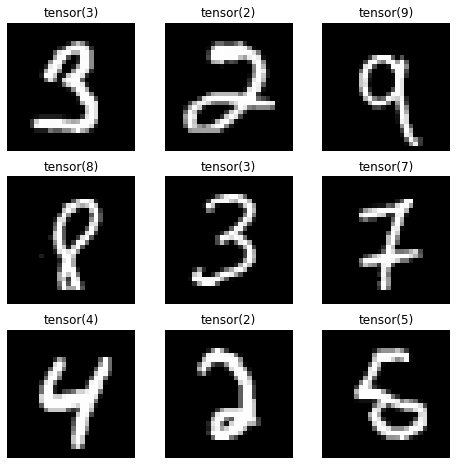

In [11]:
# Uppgift 2.4

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# Plot images and labels for a few examples using the DataLoader for the training set.
# CODE HERE

### Uppgift 3 - Bygga dense-nätverk

Det första neurala nätverket vi ska skapa är ett så kallat Fully-connected/Dense Neural Network och består därför endast av lager där alla neuroner i ett lager är sammankopplade med alla neuroner från lagret innan. I **pytorch** så kan man skapa sin egen klass för ett nätverk genom att ärva *nn.Module* och implementera en *__ init__()* samt en *forward()* metod.

Ett lager av typen FC skapas i **pytorch** med hjälp av *nn.Linear* enligt exemplet nedan. 
<pre><code> nn.Linear(nr_of_input_neurons, nr_of_output_neurons) </pre></code>
De viktigaste input-parametrarna är antalet neuroner i lagret innan, **nr_of_input_neurons**, samt hur många neuroner detta lagret ska ha, **nr_of_output_neurons**. Mer information hittar ni i dokumentationen: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear

I dokumentationen hittar ni också information om olika aktiveringsfunktioner: https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity

När nätverket är färdigt så är nästa steg att bestämma sin loss-funktion samt learning rate och optimerare.

1. Gör klart nätverket.
2. Välj loss-funktion, learning rate och optimizers.

In [63]:
# Uppgift 3.1

class DenseNet(nn.Module):
    def __init__(self, input_size=784, num_classes=10):
        super().__init__()

        # Add more Linear (FC/Dense) layers here and experiment with different number of neurons.
        self.fc_in = nn.Linear(input_size, 500)
        self.fc_middle = nn.Linear(500, 100)
        self.fc_middle2 = nn.Linear(100, 8)
        self.fc_out = nn.Linear(self.fc_middle2.out_features, num_classes)

        self.activation = nn.ReLU()

    def forward(self, x):
        # Reshapes the input of size (batch x 1x28x28) into a vector (batch x784)
        x = x.view(x.shape[0], -1)

        x = self.fc_in(x)
        
        x = self.activation(x)
        
        x = self.fc_middle(x)
        x = self.activation(x)
        
        x = self.fc_middle2(x)
        x = self.activation(x)

        x = self.fc_out(x)

        return x

In [64]:
# Create the network
dense_net = DenseNet()

# Printing the network gives an overview of the network structure
print(dense_net)
# and calculating the nuber of parameters gives the size of the network
print('Number of parameters: {}'.format(sum([param.nelement() for param in dense_net.parameters()])))


DenseNet(
  (fc_in): Linear(in_features=784, out_features=500, bias=True)
  (fc_middle): Linear(in_features=500, out_features=100, bias=True)
  (fc_middle2): Linear(in_features=100, out_features=8, bias=True)
  (fc_out): Linear(in_features=8, out_features=10, bias=True)
  (activation): ReLU()
)
Number of parameters: 443498


Bestäm en learning rate, vilken loss-funktion samt vilken optimerare som ska användas för att lösa uppgiften.

Loss-funktioner hittar man i modulen **nn** på följande sätt: 

<pre><code> nn.NamnetPåLossFunktionen() </pre></code>

där de olika varianterna hittas här https://pytorch.org/docs/stable/nn.html#loss-functions

och optimerare:

<pre><code> optim.NamnetPåOptimeraren() </pre></code>

som hittas här https://pytorch.org/docs/stable/optim.html

In [65]:
# Uppgift 3.2

learning_rate = 0.1

loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(dense_net.parameters(), lr= learning_rate)

### Uppgift 4 - Träna och evaluera dense-nätverk

Träning av nätverket innebär att vi i epoker (upprepade omgångar) låter nätverket gissa klassen på samtliga våra bilder i träningsdatan. Felet och dess gradienterna för samtliga parametrar beräknas mha loss-funktionen och nätverket uppdateras sen utifrån gradienterna av optimeraren.

1. Skriv en funktion *train(network, epoch, dataset)* som tar emot nätverket, numret på en epok samt träningsdata och utför träning av nätverket i batcher tills all data har gåtts igenom en gång. Beräkna gradienterna och uppdatera värdet.
2. Skriv en funktion *test(dataset)* som beräknar average loss och accuracy för nätverket på ett angivet dataset och sedan printar detta. Funktionen ska returnera snitt-felet som ett värde.
3. Experimentera er fram till ett nätverk som presterar bra (>96% accuracy) på det stora träningssetet och jämför sedan resultatet med en kopia av samma nätverk som man tränar om med det lilla datasetet.

Nedan följer en beskrivning i text av vad *train* ska göra:

<pre><code> 
funktion train(network, epoch, dataset)
    Sätt nätverket i träningsläge
    För varje batch i datasetet
        Nollställ optimerarens gradienter    
        Beräkna nätverkets gissningar utifrån batchen med data
        Beräkna felet mha loss-funktionen och true-labels/targets
        Beräkna fel-gradienterna för samtliga parametrar
        Uppdatera nätverket mha optimeraren
        
        För vissa batcher, printa info om hur träningen går, exempelvis batch, loss och procent av epoken som är klar.
</pre></code>

In [66]:
# Uppgift 4.1

def train(network, epoch, dataset):
    network.train()
    for i,(train_features,train_labels) in enumerate(dataset):
        optimizer.zero_grad()
        output = network(train_features)
        loss = loss_function(output, train_labels)
        loss.backward()
        optimizer.step()
        print(f"Batch = {i}, loss = {loss}, epoch = {epoch}")
        
    #raise NotImplementedError('Function not implemented yet.')

Nedan följer en beskrivning i text av vad *test* ska göra:

<pre><code> 
funktion test(network, dataset)
    y_true = []
    y_pred = []
    
    Sätt nätverket i evalueringsläge
    Stäng av användningen av gradienter
        För varje batch i datasetet
            Beräkna nätverkets gissningar utifrån batchen med data
            Beräkna felet mha loss-funktionen och true-labels/targets
            Spara gissningarna i y_pred
            Spara de rätta svaren i y_true
            
    Använd y_pred och y_true för att beräkna accuracy och skapa en confusion matrix
    Printa Avg. loss, accuracy och en confusion matrix
    Returnera Avg. loss
</pre></code>

In [67]:
# Uppgift 4.2

def test(network, dataset):
    y_true = []
    y_pred = []
    losses = []
    network.eval()
    with torch.no_grad():
        for i,(features,labels) in enumerate(dataset):
            output = network(features)
            loss = loss_function(output, labels)
            y_pred.append(output)
            y_true.append(labels)
            losses.append(loss)
    print(f"Batch = {i}, loss = {loss}, epoch = {epoch}")
    avg_loss = np.mean(losses)
    TP = 0
    for i in range(len(y_true)):
        true = y_true[i]
        pred = y_pred[i]
        _, indices = torch.max(pred, 1)
        #print(true, pred)
        match=True
        for j in range(len(true)):
            if true[j]== indices[j]:
                TP+=1
        
    accuracy = TP/(len(y_true)*len(y_true[0]))
    print(f"Avg. Loss = {avg_loss}, Accuracy = {accuracy}")
        
     
    return avg_loss
    #raise NotImplementedError('Function not implemented yet.')

Det som är kvar nu är att träna nätverket i flera omgångar (epoker) och kontinuerligt utvärdera hur träningen går mha valideringsdatan. Varje gång en ny lägsta (bästa) loss uppnås så kan modellen och optimeraren sparas för att användas igen senare.

In [68]:
n_epochs = 10
net_filename = "net.txt"
opti_filename = "opti.txt"
best_loss = 10 ** 4

for epoch in range(1, n_epochs + 1):
    # Perform training once on the entire set of training data
    train(dense_net, epoch, train_dload)  
    
    # Evaluate the net using validation data
    val_loss = test(dense_net, val_dload)
    
    # If the latest training yielded a lower validation loss than ever before, save the model to file such that the best one
    # can always be retrieved afterwards. 
    if val_loss < best_loss:
        print('Saving best model to {}\n'.format('./results/{}.pth'.format(net_filename)))
        
        # Save the network
        torch.save(dense_net.state_dict(), './results/{}.pth'.format(net_filename))
        # Save the optimizer, in case we want to continue training later
        torch.save(optimizer.state_dict(), './results/{}.pth'.format(opti_filename))
        # Update the best loss to the current loss
        best_loss = val_loss

Batch = 0, loss = 2.3100461959838867, epoch = 1
Batch = 1, loss = 2.3469178676605225, epoch = 1
Batch = 2, loss = 2.323115587234497, epoch = 1
Batch = 3, loss = 2.4301931858062744, epoch = 1
Batch = 4, loss = 2.394705295562744, epoch = 1
Batch = 5, loss = 2.294875383377075, epoch = 1
Batch = 6, loss = 2.2876646518707275, epoch = 1
Batch = 7, loss = 2.3286454677581787, epoch = 1
Batch = 8, loss = 2.357675313949585, epoch = 1
Batch = 9, loss = 2.3010826110839844, epoch = 1
Batch = 10, loss = 2.310408115386963, epoch = 1
Batch = 11, loss = 2.2452926635742188, epoch = 1
Batch = 12, loss = 2.181532382965088, epoch = 1
Batch = 13, loss = 2.3901805877685547, epoch = 1
Batch = 14, loss = 2.3107893466949463, epoch = 1
Batch = 15, loss = 2.2825748920440674, epoch = 1
Batch = 16, loss = 2.3129677772521973, epoch = 1
Batch = 17, loss = 2.4097936153411865, epoch = 1
Batch = 18, loss = 2.2429654598236084, epoch = 1
Batch = 19, loss = 2.344884157180786, epoch = 1
Batch = 20, loss = 2.1984915733337402

Batch = 204, loss = 1.6299031972885132, epoch = 1
Batch = 205, loss = 0.9802109003067017, epoch = 1
Batch = 206, loss = 2.0292742252349854, epoch = 1
Batch = 207, loss = 1.6893771886825562, epoch = 1
Batch = 208, loss = 1.5654586553573608, epoch = 1
Batch = 209, loss = 1.6339309215545654, epoch = 1
Batch = 210, loss = 0.9909452199935913, epoch = 1
Batch = 211, loss = 1.0662565231323242, epoch = 1
Batch = 212, loss = 1.3260695934295654, epoch = 1
Batch = 213, loss = 1.2494843006134033, epoch = 1
Batch = 214, loss = 1.0070006847381592, epoch = 1
Batch = 215, loss = 2.45090913772583, epoch = 1
Batch = 216, loss = 1.2677134275436401, epoch = 1
Batch = 217, loss = 1.5417307615280151, epoch = 1
Batch = 218, loss = 1.3635454177856445, epoch = 1
Batch = 219, loss = 1.071864366531372, epoch = 1
Batch = 220, loss = 1.4123538732528687, epoch = 1
Batch = 221, loss = 1.138875126838684, epoch = 1
Batch = 222, loss = 1.6152236461639404, epoch = 1
Batch = 223, loss = 1.736889123916626, epoch = 1
Batch

Batch = 402, loss = 1.012730360031128, epoch = 1
Batch = 403, loss = 0.851082444190979, epoch = 1
Batch = 404, loss = 2.137058734893799, epoch = 1
Batch = 405, loss = 1.0793367624282837, epoch = 1
Batch = 406, loss = 0.9397295713424683, epoch = 1
Batch = 407, loss = 0.5096578598022461, epoch = 1
Batch = 408, loss = 0.879922091960907, epoch = 1
Batch = 409, loss = 1.2857635021209717, epoch = 1
Batch = 410, loss = 0.8310766220092773, epoch = 1
Batch = 411, loss = 0.8636149168014526, epoch = 1
Batch = 412, loss = 0.6303056478500366, epoch = 1
Batch = 413, loss = 0.3732406198978424, epoch = 1
Batch = 414, loss = 0.5505785942077637, epoch = 1
Batch = 415, loss = 0.5982006788253784, epoch = 1
Batch = 416, loss = 0.96440190076828, epoch = 1
Batch = 417, loss = 0.5514694452285767, epoch = 1
Batch = 418, loss = 0.7254475951194763, epoch = 1
Batch = 419, loss = 1.3941075801849365, epoch = 1
Batch = 420, loss = 1.5427953004837036, epoch = 1
Batch = 421, loss = 0.808222770690918, epoch = 1
Batch =

Batch = 623, loss = 1.0179731845855713, epoch = 1
Batch = 624, loss = 0.8542178869247437, epoch = 1
Batch = 625, loss = 0.25527992844581604, epoch = 1
Batch = 626, loss = 0.6890033483505249, epoch = 1
Batch = 627, loss = 0.4587997794151306, epoch = 1
Batch = 628, loss = 0.8581878542900085, epoch = 1
Batch = 629, loss = 0.7942603826522827, epoch = 1
Batch = 630, loss = 0.7473124265670776, epoch = 1
Batch = 631, loss = 0.4339146018028259, epoch = 1
Batch = 632, loss = 0.2126934826374054, epoch = 1
Batch = 633, loss = 0.22918109595775604, epoch = 1
Batch = 634, loss = 0.8213679194450378, epoch = 1
Batch = 635, loss = 0.7031291723251343, epoch = 1
Batch = 636, loss = 0.1798800230026245, epoch = 1
Batch = 637, loss = 0.5190286636352539, epoch = 1
Batch = 638, loss = 0.195236474275589, epoch = 1
Batch = 639, loss = 0.18099388480186462, epoch = 1
Batch = 640, loss = 0.2967398166656494, epoch = 1
Batch = 641, loss = 0.08118072152137756, epoch = 1
Batch = 642, loss = 0.17973759770393372, epoch 

Batch = 827, loss = 0.17828257381916046, epoch = 1
Batch = 828, loss = 0.6816622018814087, epoch = 1
Batch = 829, loss = 0.5974591970443726, epoch = 1
Batch = 830, loss = 0.45167580246925354, epoch = 1
Batch = 831, loss = 0.43126338720321655, epoch = 1
Batch = 832, loss = 0.3204073905944824, epoch = 1
Batch = 833, loss = 0.1495833843946457, epoch = 1
Batch = 834, loss = 0.8129304051399231, epoch = 1
Batch = 835, loss = 0.5263685584068298, epoch = 1
Batch = 836, loss = 0.5754367113113403, epoch = 1
Batch = 837, loss = 0.20103614032268524, epoch = 1
Batch = 838, loss = 1.2342276573181152, epoch = 1
Batch = 839, loss = 0.09502455592155457, epoch = 1
Batch = 840, loss = 0.5023680925369263, epoch = 1
Batch = 841, loss = 1.0366039276123047, epoch = 1
Batch = 842, loss = 0.15238025784492493, epoch = 1
Batch = 843, loss = 0.2327078878879547, epoch = 1
Batch = 844, loss = 0.343234121799469, epoch = 1
Batch = 845, loss = 0.30726882815361023, epoch = 1
Batch = 846, loss = 0.4479917883872986, epoc

Batch = 1033, loss = 0.2677323818206787, epoch = 1
Batch = 1034, loss = 0.3453984260559082, epoch = 1
Batch = 1035, loss = 0.07224175333976746, epoch = 1
Batch = 1036, loss = 0.6253570914268494, epoch = 1
Batch = 1037, loss = 0.13800464570522308, epoch = 1
Batch = 1038, loss = 0.1322879046201706, epoch = 1
Batch = 1039, loss = 0.309212327003479, epoch = 1
Batch = 1040, loss = 0.2427782565355301, epoch = 1
Batch = 1041, loss = 0.36282169818878174, epoch = 1
Batch = 1042, loss = 0.8749326467514038, epoch = 1
Batch = 1043, loss = 0.09760555624961853, epoch = 1
Batch = 1044, loss = 0.05637349560856819, epoch = 1
Batch = 1045, loss = 0.15249723196029663, epoch = 1
Batch = 1046, loss = 0.09854838997125626, epoch = 1
Batch = 1047, loss = 0.23421302437782288, epoch = 1
Batch = 1048, loss = 0.06888757646083832, epoch = 1
Batch = 1049, loss = 0.3042454123497009, epoch = 1
Batch = 1050, loss = 1.0106838941574097, epoch = 1
Batch = 1051, loss = 0.15899161994457245, epoch = 1
Batch = 1052, loss = 0

Batch = 1246, loss = 0.7694742679595947, epoch = 1
Batch = 1247, loss = 1.2008156776428223, epoch = 1
Batch = 1248, loss = 0.2656845152378082, epoch = 1
Batch = 1249, loss = 0.2698807716369629, epoch = 1
Batch = 1250, loss = 0.7235501408576965, epoch = 1
Batch = 1251, loss = 0.4087317883968353, epoch = 1
Batch = 1252, loss = 0.34879010915756226, epoch = 1
Batch = 1253, loss = 0.5886653661727905, epoch = 1
Batch = 1254, loss = 0.2730560302734375, epoch = 1
Batch = 1255, loss = 0.06018654257059097, epoch = 1
Batch = 1256, loss = 0.13598230481147766, epoch = 1
Batch = 1257, loss = 0.32200074195861816, epoch = 1
Batch = 1258, loss = 0.5366193056106567, epoch = 1
Batch = 1259, loss = 0.32660043239593506, epoch = 1
Batch = 1260, loss = 0.3835068345069885, epoch = 1
Batch = 1261, loss = 0.46985310316085815, epoch = 1
Batch = 1262, loss = 0.3053744435310364, epoch = 1
Batch = 1263, loss = 0.2847328186035156, epoch = 1
Batch = 1264, loss = 0.7281047105789185, epoch = 1
Batch = 1265, loss = 0.54

Batch = 1446, loss = 0.26099544763565063, epoch = 1
Batch = 1447, loss = 0.14589467644691467, epoch = 1
Batch = 1448, loss = 0.06515800952911377, epoch = 1
Batch = 1449, loss = 0.8163694143295288, epoch = 1
Batch = 1450, loss = 0.26354241371154785, epoch = 1
Batch = 1451, loss = 0.41950660943984985, epoch = 1
Batch = 1452, loss = 0.13710594177246094, epoch = 1
Batch = 1453, loss = 0.7914179563522339, epoch = 1
Batch = 1454, loss = 0.45289912819862366, epoch = 1
Batch = 1455, loss = 0.512965738773346, epoch = 1
Batch = 1456, loss = 0.3713141679763794, epoch = 1
Batch = 1457, loss = 0.10237865149974823, epoch = 1
Batch = 1458, loss = 0.9244871139526367, epoch = 1
Batch = 1459, loss = 0.17447473108768463, epoch = 1
Batch = 1460, loss = 0.24757003784179688, epoch = 1
Batch = 1461, loss = 0.6095126867294312, epoch = 1
Batch = 1462, loss = 0.11156408488750458, epoch = 1
Batch = 1463, loss = 0.5812646746635437, epoch = 1
Batch = 1464, loss = 0.37098026275634766, epoch = 1
Batch = 1465, loss =

Batch = 1664, loss = 0.01105863880366087, epoch = 1
Batch = 1665, loss = 0.5535564422607422, epoch = 1
Batch = 1666, loss = 0.013991810381412506, epoch = 1
Batch = 1667, loss = 0.10550876706838608, epoch = 1
Batch = 1668, loss = 0.36016982793807983, epoch = 1
Batch = 1669, loss = 0.546866774559021, epoch = 1
Batch = 1670, loss = 0.1714973896741867, epoch = 1
Batch = 1671, loss = 0.13458339869976044, epoch = 1
Batch = 1672, loss = 1.4800617694854736, epoch = 1
Batch = 1673, loss = 0.4588238298892975, epoch = 1
Batch = 1674, loss = 0.03671875596046448, epoch = 1
Batch = 1675, loss = 0.03392111510038376, epoch = 1
Batch = 1676, loss = 0.013880620710551739, epoch = 1
Batch = 1677, loss = 0.28574293851852417, epoch = 1
Batch = 1678, loss = 1.023029088973999, epoch = 1
Batch = 1679, loss = 0.1279924213886261, epoch = 1
Batch = 1680, loss = 0.8342747688293457, epoch = 1
Batch = 1681, loss = 0.10491549968719482, epoch = 1
Batch = 1682, loss = 0.41274064779281616, epoch = 1
Batch = 1683, loss =

Batch = 1876, loss = 0.4509216248989105, epoch = 1
Batch = 1877, loss = 0.24133042991161346, epoch = 1
Batch = 1878, loss = 0.037071555852890015, epoch = 1
Batch = 1879, loss = 0.10303852707147598, epoch = 1
Batch = 1880, loss = 0.1948557198047638, epoch = 1
Batch = 1881, loss = 0.04263187199831009, epoch = 1
Batch = 1882, loss = 0.03536028414964676, epoch = 1
Batch = 1883, loss = 0.09633617103099823, epoch = 1
Batch = 1884, loss = 1.4332363605499268, epoch = 1
Batch = 1885, loss = 0.40516358613967896, epoch = 1
Batch = 1886, loss = 0.14073830842971802, epoch = 1
Batch = 1887, loss = 0.596988320350647, epoch = 1
Batch = 1888, loss = 1.1465704441070557, epoch = 1
Batch = 1889, loss = 0.4905261993408203, epoch = 1
Batch = 1890, loss = 0.4000379145145416, epoch = 1
Batch = 1891, loss = 0.055484116077423096, epoch = 1
Batch = 1892, loss = 0.29715558886528015, epoch = 1
Batch = 1893, loss = 0.2903394103050232, epoch = 1
Batch = 1894, loss = 0.1014513224363327, epoch = 1
Batch = 1895, loss =

Batch = 2093, loss = 0.2639380395412445, epoch = 1
Batch = 2094, loss = 0.0480373278260231, epoch = 1
Batch = 2095, loss = 1.2607144117355347, epoch = 1
Batch = 2096, loss = 0.6409386396408081, epoch = 1
Batch = 2097, loss = 0.21463198959827423, epoch = 1
Batch = 2098, loss = 0.493063747882843, epoch = 1
Batch = 2099, loss = 0.2918611168861389, epoch = 1
Batch = 2100, loss = 0.5543311834335327, epoch = 1
Batch = 2101, loss = 0.08243092894554138, epoch = 1
Batch = 2102, loss = 0.5234043002128601, epoch = 1
Batch = 2103, loss = 0.1328054964542389, epoch = 1
Batch = 2104, loss = 0.18123343586921692, epoch = 1
Batch = 2105, loss = 0.013366900384426117, epoch = 1
Batch = 2106, loss = 0.08132912218570709, epoch = 1
Batch = 2107, loss = 0.10567764192819595, epoch = 1
Batch = 2108, loss = 0.19209785759449005, epoch = 1
Batch = 2109, loss = 0.0463147908449173, epoch = 1
Batch = 2110, loss = 0.3280380368232727, epoch = 1
Batch = 2111, loss = 0.33702367544174194, epoch = 1
Batch = 2112, loss = 0.

Batch = 2297, loss = 0.4252778887748718, epoch = 1
Batch = 2298, loss = 0.09224992990493774, epoch = 1
Batch = 2299, loss = 0.10404858738183975, epoch = 1
Batch = 2300, loss = 0.452798992395401, epoch = 1
Batch = 2301, loss = 0.05548067018389702, epoch = 1
Batch = 2302, loss = 0.1383751928806305, epoch = 1
Batch = 2303, loss = 0.6805397868156433, epoch = 1
Batch = 2304, loss = 0.061288751661777496, epoch = 1
Batch = 2305, loss = 0.42345771193504333, epoch = 1
Batch = 2306, loss = 0.33204299211502075, epoch = 1
Batch = 2307, loss = 0.35858696699142456, epoch = 1
Batch = 2308, loss = 0.49677881598472595, epoch = 1
Batch = 2309, loss = 0.04198484495282173, epoch = 1
Batch = 2310, loss = 0.057883650064468384, epoch = 1
Batch = 2311, loss = 0.004982012324035168, epoch = 1
Batch = 2312, loss = 0.4248921871185303, epoch = 1
Batch = 2313, loss = 0.15179258584976196, epoch = 1
Batch = 2314, loss = 0.15415912866592407, epoch = 1
Batch = 2315, loss = 0.07051195204257965, epoch = 1
Batch = 2316, l

Batch = 111, loss = 0.3796524405479431, epoch = 2
Batch = 112, loss = 0.09786292910575867, epoch = 2
Batch = 113, loss = 0.09711691737174988, epoch = 2
Batch = 114, loss = 0.07896663248538971, epoch = 2
Batch = 115, loss = 0.31718331575393677, epoch = 2
Batch = 116, loss = 0.0350528210401535, epoch = 2
Batch = 117, loss = 0.6072683930397034, epoch = 2
Batch = 118, loss = 0.6956547498703003, epoch = 2
Batch = 119, loss = 0.33027514815330505, epoch = 2
Batch = 120, loss = 0.06052732467651367, epoch = 2
Batch = 121, loss = 0.10728424787521362, epoch = 2
Batch = 122, loss = 0.22268228232860565, epoch = 2
Batch = 123, loss = 0.12576475739479065, epoch = 2
Batch = 124, loss = 0.03766121715307236, epoch = 2
Batch = 125, loss = 0.0742826908826828, epoch = 2
Batch = 126, loss = 0.016558881849050522, epoch = 2
Batch = 127, loss = 0.1475239098072052, epoch = 2
Batch = 128, loss = 0.4255185127258301, epoch = 2
Batch = 129, loss = 1.4417786598205566, epoch = 2
Batch = 130, loss = 0.0597164034843444

Batch = 318, loss = 0.5331915616989136, epoch = 2
Batch = 319, loss = 0.017690321430563927, epoch = 2
Batch = 320, loss = 0.19762323796749115, epoch = 2
Batch = 321, loss = 0.03649952635169029, epoch = 2
Batch = 322, loss = 0.2820613980293274, epoch = 2
Batch = 323, loss = 0.3730212450027466, epoch = 2
Batch = 324, loss = 0.04712991788983345, epoch = 2
Batch = 325, loss = 0.08524052798748016, epoch = 2
Batch = 326, loss = 0.03575938194990158, epoch = 2
Batch = 327, loss = 0.581480085849762, epoch = 2
Batch = 328, loss = 0.03715309500694275, epoch = 2
Batch = 329, loss = 0.004621284548193216, epoch = 2
Batch = 330, loss = 0.4017370641231537, epoch = 2
Batch = 331, loss = 0.08483432233333588, epoch = 2
Batch = 332, loss = 0.05251886323094368, epoch = 2
Batch = 333, loss = 0.01478145457804203, epoch = 2
Batch = 334, loss = 0.47135472297668457, epoch = 2
Batch = 335, loss = 0.029319774359464645, epoch = 2
Batch = 336, loss = 0.16393008828163147, epoch = 2
Batch = 337, loss = 0.040965914726

Batch = 529, loss = 0.39561358094215393, epoch = 2
Batch = 530, loss = 0.11227141320705414, epoch = 2
Batch = 531, loss = 0.02127818576991558, epoch = 2
Batch = 532, loss = 0.07755178213119507, epoch = 2
Batch = 533, loss = 0.05923496559262276, epoch = 2
Batch = 534, loss = 0.34863439202308655, epoch = 2
Batch = 535, loss = 0.05124320834875107, epoch = 2
Batch = 536, loss = 0.05731834098696709, epoch = 2
Batch = 537, loss = 0.12421117722988129, epoch = 2
Batch = 538, loss = 0.7196449041366577, epoch = 2
Batch = 539, loss = 0.4938230514526367, epoch = 2
Batch = 540, loss = 0.22451519966125488, epoch = 2
Batch = 541, loss = 0.0960579439997673, epoch = 2
Batch = 542, loss = 0.20705442130565643, epoch = 2
Batch = 543, loss = 0.4206260144710541, epoch = 2
Batch = 544, loss = 0.2884944677352905, epoch = 2
Batch = 545, loss = 0.14255346357822418, epoch = 2
Batch = 546, loss = 0.44743913412094116, epoch = 2
Batch = 547, loss = 0.19924795627593994, epoch = 2
Batch = 548, loss = 0.16735111176967

Batch = 730, loss = 0.26391834020614624, epoch = 2
Batch = 731, loss = 0.05706081911921501, epoch = 2
Batch = 732, loss = 0.19415901601314545, epoch = 2
Batch = 733, loss = 0.24996152520179749, epoch = 2
Batch = 734, loss = 0.008439729921519756, epoch = 2
Batch = 735, loss = 0.13318535685539246, epoch = 2
Batch = 736, loss = 1.2076938152313232, epoch = 2
Batch = 737, loss = 0.3314906060695648, epoch = 2
Batch = 738, loss = 0.23256441950798035, epoch = 2
Batch = 739, loss = 0.012859901413321495, epoch = 2
Batch = 740, loss = 0.01920977607369423, epoch = 2
Batch = 741, loss = 0.06846600770950317, epoch = 2
Batch = 742, loss = 0.34915509819984436, epoch = 2
Batch = 743, loss = 0.0016351686790585518, epoch = 2
Batch = 744, loss = 0.00580552127212286, epoch = 2
Batch = 745, loss = 0.016139987856149673, epoch = 2
Batch = 746, loss = 0.014362175948917866, epoch = 2
Batch = 747, loss = 0.7775436639785767, epoch = 2
Batch = 748, loss = 0.011872269213199615, epoch = 2
Batch = 749, loss = 0.01318

Batch = 959, loss = 0.20041286945343018, epoch = 2
Batch = 960, loss = 0.002382450271397829, epoch = 2
Batch = 961, loss = 0.29367193579673767, epoch = 2
Batch = 962, loss = 0.015305520966649055, epoch = 2
Batch = 963, loss = 0.0725122019648552, epoch = 2
Batch = 964, loss = 0.02185702510178089, epoch = 2
Batch = 965, loss = 0.10766986757516861, epoch = 2
Batch = 966, loss = 0.260629266500473, epoch = 2
Batch = 967, loss = 0.19554026424884796, epoch = 2
Batch = 968, loss = 0.006936756428331137, epoch = 2
Batch = 969, loss = 0.17311367392539978, epoch = 2
Batch = 970, loss = 0.18955662846565247, epoch = 2
Batch = 971, loss = 0.014666023664176464, epoch = 2
Batch = 972, loss = 0.5064011216163635, epoch = 2
Batch = 973, loss = 0.002808523364365101, epoch = 2
Batch = 974, loss = 1.258777379989624, epoch = 2
Batch = 975, loss = 0.02200566977262497, epoch = 2
Batch = 976, loss = 0.35263869166374207, epoch = 2
Batch = 977, loss = 0.41888323426246643, epoch = 2
Batch = 978, loss = 0.4338746070

Batch = 1162, loss = 0.007578164339065552, epoch = 2
Batch = 1163, loss = 0.00409120274707675, epoch = 2
Batch = 1164, loss = 0.030844876542687416, epoch = 2
Batch = 1165, loss = 0.020813386887311935, epoch = 2
Batch = 1166, loss = 0.042657267302274704, epoch = 2
Batch = 1167, loss = 0.004696838557720184, epoch = 2
Batch = 1168, loss = 0.01646326296031475, epoch = 2
Batch = 1169, loss = 0.014547957107424736, epoch = 2
Batch = 1170, loss = 0.06142374873161316, epoch = 2
Batch = 1171, loss = 0.0756407231092453, epoch = 2
Batch = 1172, loss = 0.006851674057543278, epoch = 2
Batch = 1173, loss = 0.007759507745504379, epoch = 2
Batch = 1174, loss = 0.06755192577838898, epoch = 2
Batch = 1175, loss = 0.008917786180973053, epoch = 2
Batch = 1176, loss = 0.04408927634358406, epoch = 2
Batch = 1177, loss = 0.00224830093793571, epoch = 2
Batch = 1178, loss = 0.10112999379634857, epoch = 2
Batch = 1179, loss = 0.011668210849165916, epoch = 2
Batch = 1180, loss = 0.02240201085805893, epoch = 2
Bat

Batch = 1334, loss = 0.007128557655960321, epoch = 2
Batch = 1335, loss = 0.008806728757917881, epoch = 2
Batch = 1336, loss = 0.8450843095779419, epoch = 2
Batch = 1337, loss = 0.06518525630235672, epoch = 2
Batch = 1338, loss = 0.048282526433467865, epoch = 2
Batch = 1339, loss = 0.07722203433513641, epoch = 2
Batch = 1340, loss = 0.8924684524536133, epoch = 2
Batch = 1341, loss = 0.04061318188905716, epoch = 2
Batch = 1342, loss = 0.3107270896434784, epoch = 2
Batch = 1343, loss = 0.045541875064373016, epoch = 2
Batch = 1344, loss = 1.3309385776519775, epoch = 2
Batch = 1345, loss = 0.016952907666563988, epoch = 2
Batch = 1346, loss = 0.15278178453445435, epoch = 2
Batch = 1347, loss = 0.6286218166351318, epoch = 2
Batch = 1348, loss = 0.01302200835198164, epoch = 2
Batch = 1349, loss = 0.5200262069702148, epoch = 2
Batch = 1350, loss = 0.16704177856445312, epoch = 2
Batch = 1351, loss = 0.09491754323244095, epoch = 2
Batch = 1352, loss = 0.34547752141952515, epoch = 2
Batch = 1353,

Batch = 1555, loss = 0.2096598595380783, epoch = 2
Batch = 1556, loss = 0.10684678703546524, epoch = 2
Batch = 1557, loss = 0.11229752004146576, epoch = 2
Batch = 1558, loss = 0.006960591766983271, epoch = 2
Batch = 1559, loss = 0.16487762331962585, epoch = 2
Batch = 1560, loss = 0.29719769954681396, epoch = 2
Batch = 1561, loss = 0.008372987620532513, epoch = 2
Batch = 1562, loss = 0.24686186015605927, epoch = 2
Batch = 1563, loss = 0.093848317861557, epoch = 2
Batch = 1564, loss = 0.0700698047876358, epoch = 2
Batch = 1565, loss = 0.22167034447193146, epoch = 2
Batch = 1566, loss = 0.4658431112766266, epoch = 2
Batch = 1567, loss = 0.00943237729370594, epoch = 2
Batch = 1568, loss = 0.23959311842918396, epoch = 2
Batch = 1569, loss = 0.21490788459777832, epoch = 2
Batch = 1570, loss = 0.026224154978990555, epoch = 2
Batch = 1571, loss = 0.15666815638542175, epoch = 2
Batch = 1572, loss = 0.11812015622854233, epoch = 2
Batch = 1573, loss = 0.14761826395988464, epoch = 2
Batch = 1574, 

Batch = 1785, loss = 0.27397555112838745, epoch = 2
Batch = 1786, loss = 0.02375923842191696, epoch = 2
Batch = 1787, loss = 0.16054077446460724, epoch = 2
Batch = 1788, loss = 0.21508033573627472, epoch = 2
Batch = 1789, loss = 0.0046355510130524635, epoch = 2
Batch = 1790, loss = 0.11708980798721313, epoch = 2
Batch = 1791, loss = 0.03883366659283638, epoch = 2
Batch = 1792, loss = 0.017789384350180626, epoch = 2
Batch = 1793, loss = 1.0216624736785889, epoch = 2
Batch = 1794, loss = 0.006056806072592735, epoch = 2
Batch = 1795, loss = 0.06936846673488617, epoch = 2
Batch = 1796, loss = 0.2208893597126007, epoch = 2
Batch = 1797, loss = 0.009737848304212093, epoch = 2
Batch = 1798, loss = 0.035615913569927216, epoch = 2
Batch = 1799, loss = 0.07152155041694641, epoch = 2
Batch = 1800, loss = 0.011708565056324005, epoch = 2
Batch = 1801, loss = 0.16071385145187378, epoch = 2
Batch = 1802, loss = 0.008276538923382759, epoch = 2
Batch = 1803, loss = 0.03073463775217533, epoch = 2
Batch 

Batch = 2009, loss = 0.20916160941123962, epoch = 2
Batch = 2010, loss = 0.2731177806854248, epoch = 2
Batch = 2011, loss = 0.0057047330774366856, epoch = 2
Batch = 2012, loss = 0.21011872589588165, epoch = 2
Batch = 2013, loss = 0.6079400777816772, epoch = 2
Batch = 2014, loss = 0.049286022782325745, epoch = 2
Batch = 2015, loss = 0.003792721079662442, epoch = 2
Batch = 2016, loss = 0.145125612616539, epoch = 2
Batch = 2017, loss = 0.05652725696563721, epoch = 2
Batch = 2018, loss = 0.027238553389906883, epoch = 2
Batch = 2019, loss = 0.20123736560344696, epoch = 2
Batch = 2020, loss = 0.041631706058979034, epoch = 2
Batch = 2021, loss = 0.07569621503353119, epoch = 2
Batch = 2022, loss = 0.18621936440467834, epoch = 2
Batch = 2023, loss = 0.16756826639175415, epoch = 2
Batch = 2024, loss = 0.15566031634807587, epoch = 2
Batch = 2025, loss = 0.17538687586784363, epoch = 2
Batch = 2026, loss = 0.10223592817783356, epoch = 2
Batch = 2027, loss = 0.0035738174337893724, epoch = 2
Batch = 

Batch = 2239, loss = 0.0074952030554413795, epoch = 2
Batch = 2240, loss = 0.11684463918209076, epoch = 2
Batch = 2241, loss = 0.5220750570297241, epoch = 2
Batch = 2242, loss = 0.03141055628657341, epoch = 2
Batch = 2243, loss = 0.010129837319254875, epoch = 2
Batch = 2244, loss = 0.23485346138477325, epoch = 2
Batch = 2245, loss = 0.006979832891374826, epoch = 2
Batch = 2246, loss = 0.007097350899130106, epoch = 2
Batch = 2247, loss = 0.029177969321608543, epoch = 2
Batch = 2248, loss = 0.8227044343948364, epoch = 2
Batch = 2249, loss = 0.2270088940858841, epoch = 2
Batch = 2250, loss = 0.044849492609500885, epoch = 2
Batch = 2251, loss = 0.015418541617691517, epoch = 2
Batch = 2252, loss = 0.11107248067855835, epoch = 2
Batch = 2253, loss = 0.0056890761479735374, epoch = 2
Batch = 2254, loss = 0.07265208661556244, epoch = 2
Batch = 2255, loss = 0.33888059854507446, epoch = 2
Batch = 2256, loss = 0.06610886752605438, epoch = 2
Batch = 2257, loss = 0.016892829909920692, epoch = 2
Batc

Batch = 799, loss = 0.06419481337070465, epoch = 2
Avg. Loss = 0.17791788280010223, Accuracy = 0.9465
Saving best model to ./results/net.txt.pth

Batch = 0, loss = 0.030639614909887314, epoch = 3
Batch = 1, loss = 0.0644204244017601, epoch = 3
Batch = 2, loss = 0.06304898113012314, epoch = 3
Batch = 3, loss = 0.047726333141326904, epoch = 3
Batch = 4, loss = 0.3302122950553894, epoch = 3
Batch = 5, loss = 0.014783131889998913, epoch = 3
Batch = 6, loss = 0.2075377255678177, epoch = 3
Batch = 7, loss = 0.24127468466758728, epoch = 3
Batch = 8, loss = 0.4186108708381653, epoch = 3
Batch = 9, loss = 0.3319719731807709, epoch = 3
Batch = 10, loss = 0.5350343585014343, epoch = 3
Batch = 11, loss = 0.010046781972050667, epoch = 3
Batch = 12, loss = 0.4660237431526184, epoch = 3
Batch = 13, loss = 0.596110463142395, epoch = 3
Batch = 14, loss = 0.17324484884738922, epoch = 3
Batch = 15, loss = 0.011368265375494957, epoch = 3
Batch = 16, loss = 0.1308729648590088, epoch = 3
Batch = 17, loss = 

Batch = 167, loss = 0.0044527300633490086, epoch = 3
Batch = 168, loss = 0.24207258224487305, epoch = 3
Batch = 169, loss = 0.02787514589726925, epoch = 3
Batch = 170, loss = 0.020396782085299492, epoch = 3
Batch = 171, loss = 0.21687200665473938, epoch = 3
Batch = 172, loss = 0.09586451947689056, epoch = 3
Batch = 173, loss = 0.02087387815117836, epoch = 3
Batch = 174, loss = 0.020695414394140244, epoch = 3
Batch = 175, loss = 0.0015298080397769809, epoch = 3
Batch = 176, loss = 0.004198527429252863, epoch = 3
Batch = 177, loss = 0.49648016691207886, epoch = 3
Batch = 178, loss = 0.021054739132523537, epoch = 3
Batch = 179, loss = 0.2400599718093872, epoch = 3
Batch = 180, loss = 0.14181312918663025, epoch = 3
Batch = 181, loss = 0.1747443974018097, epoch = 3
Batch = 182, loss = 0.1331513226032257, epoch = 3
Batch = 183, loss = 0.18045635521411896, epoch = 3
Batch = 184, loss = 0.006647833622992039, epoch = 3
Batch = 185, loss = 0.23790188133716583, epoch = 3
Batch = 186, loss = 0.017

Batch = 372, loss = 0.08630629628896713, epoch = 3
Batch = 373, loss = 0.06185118481516838, epoch = 3
Batch = 374, loss = 0.06475864350795746, epoch = 3
Batch = 375, loss = 0.18804176151752472, epoch = 3
Batch = 376, loss = 0.08395243436098099, epoch = 3
Batch = 377, loss = 0.24936945736408234, epoch = 3
Batch = 378, loss = 0.10768310725688934, epoch = 3
Batch = 379, loss = 0.014956077560782433, epoch = 3
Batch = 380, loss = 0.002599207451567054, epoch = 3
Batch = 381, loss = 0.03795795142650604, epoch = 3
Batch = 382, loss = 0.010464717634022236, epoch = 3
Batch = 383, loss = 0.004510027356445789, epoch = 3
Batch = 384, loss = 0.1977560818195343, epoch = 3
Batch = 385, loss = 0.030170157551765442, epoch = 3
Batch = 386, loss = 0.11432315409183502, epoch = 3
Batch = 387, loss = 0.01734922081232071, epoch = 3
Batch = 388, loss = 0.052860163152217865, epoch = 3
Batch = 389, loss = 0.3950243592262268, epoch = 3
Batch = 390, loss = 0.19385144114494324, epoch = 3
Batch = 391, loss = 0.02144

Batch = 557, loss = 0.36879175901412964, epoch = 3
Batch = 558, loss = 0.28118887543678284, epoch = 3
Batch = 559, loss = 0.008943876251578331, epoch = 3
Batch = 560, loss = 0.008860883302986622, epoch = 3
Batch = 561, loss = 0.170877143740654, epoch = 3
Batch = 562, loss = 0.0047439755871891975, epoch = 3
Batch = 563, loss = 0.001244755694642663, epoch = 3
Batch = 564, loss = 0.0038727123755961657, epoch = 3
Batch = 565, loss = 0.07329405099153519, epoch = 3
Batch = 566, loss = 0.026391606777906418, epoch = 3
Batch = 567, loss = 0.0010420631151646376, epoch = 3
Batch = 568, loss = 0.033323194831609726, epoch = 3
Batch = 569, loss = 0.8274381756782532, epoch = 3
Batch = 570, loss = 0.30323904752731323, epoch = 3
Batch = 571, loss = 0.0009585274383425713, epoch = 3
Batch = 572, loss = 0.01387071143835783, epoch = 3
Batch = 573, loss = 0.2221512496471405, epoch = 3
Batch = 574, loss = 0.6213098764419556, epoch = 3
Batch = 575, loss = 0.26642662286758423, epoch = 3
Batch = 576, loss = 0.1

Batch = 783, loss = 0.12150289863348007, epoch = 3
Batch = 784, loss = 0.004397089593112469, epoch = 3
Batch = 785, loss = 0.02807627245783806, epoch = 3
Batch = 786, loss = 0.005643938202410936, epoch = 3
Batch = 787, loss = 0.2356349676847458, epoch = 3
Batch = 788, loss = 0.003057333407923579, epoch = 3
Batch = 789, loss = 0.008824585005640984, epoch = 3
Batch = 790, loss = 0.09632741659879684, epoch = 3
Batch = 791, loss = 0.017195608466863632, epoch = 3
Batch = 792, loss = 0.007623451296240091, epoch = 3
Batch = 793, loss = 0.03329019248485565, epoch = 3
Batch = 794, loss = 0.03399599343538284, epoch = 3
Batch = 795, loss = 0.03697287291288376, epoch = 3
Batch = 796, loss = 0.4654765725135803, epoch = 3
Batch = 797, loss = 0.02901085838675499, epoch = 3
Batch = 798, loss = 0.3679502308368683, epoch = 3
Batch = 799, loss = 0.22559937834739685, epoch = 3
Batch = 800, loss = 0.003503261599689722, epoch = 3
Batch = 801, loss = 0.05606163665652275, epoch = 3
Batch = 802, loss = 0.08324

Batch = 999, loss = 0.15506590902805328, epoch = 3
Batch = 1000, loss = 0.024244170635938644, epoch = 3
Batch = 1001, loss = 0.010345805436372757, epoch = 3
Batch = 1002, loss = 0.005834059324115515, epoch = 3
Batch = 1003, loss = 0.008127003908157349, epoch = 3
Batch = 1004, loss = 0.024064509198069572, epoch = 3
Batch = 1005, loss = 0.002409515669569373, epoch = 3
Batch = 1006, loss = 0.03589595854282379, epoch = 3
Batch = 1007, loss = 0.0073867132887244225, epoch = 3
Batch = 1008, loss = 0.0026207375340163708, epoch = 3
Batch = 1009, loss = 0.04288720339536667, epoch = 3
Batch = 1010, loss = 0.004632140509784222, epoch = 3
Batch = 1011, loss = 0.04662248492240906, epoch = 3
Batch = 1012, loss = 0.002752650761976838, epoch = 3
Batch = 1013, loss = 0.05893176048994064, epoch = 3
Batch = 1014, loss = 0.2515835762023926, epoch = 3
Batch = 1015, loss = 0.021051183342933655, epoch = 3
Batch = 1016, loss = 0.003684990806505084, epoch = 3
Batch = 1017, loss = 0.0638328269124031, epoch = 3
B

Batch = 1222, loss = 0.176599383354187, epoch = 3
Batch = 1223, loss = 0.010048016905784607, epoch = 3
Batch = 1224, loss = 0.0016651615733280778, epoch = 3
Batch = 1225, loss = 0.022576162591576576, epoch = 3
Batch = 1226, loss = 0.004795907996594906, epoch = 3
Batch = 1227, loss = 0.06373737752437592, epoch = 3
Batch = 1228, loss = 0.0005512934876605868, epoch = 3
Batch = 1229, loss = 0.00276797148399055, epoch = 3
Batch = 1230, loss = 0.030763398855924606, epoch = 3
Batch = 1231, loss = 0.0013308444758877158, epoch = 3
Batch = 1232, loss = 0.11259621381759644, epoch = 3
Batch = 1233, loss = 0.0757032260298729, epoch = 3
Batch = 1234, loss = 0.0016624316340312362, epoch = 3
Batch = 1235, loss = 0.0437605157494545, epoch = 3
Batch = 1236, loss = 0.5342625379562378, epoch = 3
Batch = 1237, loss = 0.016625266522169113, epoch = 3
Batch = 1238, loss = 0.10593731701374054, epoch = 3
Batch = 1239, loss = 0.09043941646814346, epoch = 3
Batch = 1240, loss = 0.03807414695620537, epoch = 3
Batc

Batch = 1453, loss = 0.2631220817565918, epoch = 3
Batch = 1454, loss = 0.11342816054821014, epoch = 3
Batch = 1455, loss = 0.009588153101503849, epoch = 3
Batch = 1456, loss = 0.20701666176319122, epoch = 3
Batch = 1457, loss = 0.02279142662882805, epoch = 3
Batch = 1458, loss = 0.02663007751107216, epoch = 3
Batch = 1459, loss = 0.0019074610900133848, epoch = 3
Batch = 1460, loss = 0.0015745451673865318, epoch = 3
Batch = 1461, loss = 0.0026116485241800547, epoch = 3
Batch = 1462, loss = 0.08010304719209671, epoch = 3
Batch = 1463, loss = 0.14575572311878204, epoch = 3
Batch = 1464, loss = 0.0036258138716220856, epoch = 3
Batch = 1465, loss = 0.0007019864278845489, epoch = 3
Batch = 1466, loss = 0.44426408410072327, epoch = 3
Batch = 1467, loss = 0.03355137258768082, epoch = 3
Batch = 1468, loss = 0.004646634683012962, epoch = 3
Batch = 1469, loss = 0.09590132534503937, epoch = 3
Batch = 1470, loss = 0.3452981114387512, epoch = 3
Batch = 1471, loss = 0.007757452316582203, epoch = 3
B

Batch = 1676, loss = 0.003476504934951663, epoch = 3
Batch = 1677, loss = 0.010563870891928673, epoch = 3
Batch = 1678, loss = 1.0264780521392822, epoch = 3
Batch = 1679, loss = 0.004457822069525719, epoch = 3
Batch = 1680, loss = 0.19272124767303467, epoch = 3
Batch = 1681, loss = 0.0036348991561681032, epoch = 3
Batch = 1682, loss = 0.024332746863365173, epoch = 3
Batch = 1683, loss = 0.0007158077205531299, epoch = 3
Batch = 1684, loss = 0.010927903465926647, epoch = 3
Batch = 1685, loss = 0.0655062198638916, epoch = 3
Batch = 1686, loss = 0.2733604311943054, epoch = 3
Batch = 1687, loss = 0.6737693548202515, epoch = 3
Batch = 1688, loss = 0.06720507144927979, epoch = 3
Batch = 1689, loss = 0.030391255393624306, epoch = 3
Batch = 1690, loss = 0.06537328660488129, epoch = 3
Batch = 1691, loss = 0.043921567499637604, epoch = 3
Batch = 1692, loss = 0.005264576990157366, epoch = 3
Batch = 1693, loss = 0.014267767779529095, epoch = 3
Batch = 1694, loss = 0.01926056668162346, epoch = 3
Bat

Batch = 1904, loss = 0.002474032575264573, epoch = 3
Batch = 1905, loss = 0.05888332799077034, epoch = 3
Batch = 1906, loss = 0.002997387433424592, epoch = 3
Batch = 1907, loss = 0.17004430294036865, epoch = 3
Batch = 1908, loss = 0.0030579520389437675, epoch = 3
Batch = 1909, loss = 0.010203585959970951, epoch = 3
Batch = 1910, loss = 0.001469323760829866, epoch = 3
Batch = 1911, loss = 0.14862412214279175, epoch = 3
Batch = 1912, loss = 0.023361586034297943, epoch = 3
Batch = 1913, loss = 0.0014425644185394049, epoch = 3
Batch = 1914, loss = 0.02042311802506447, epoch = 3
Batch = 1915, loss = 0.006897340063005686, epoch = 3
Batch = 1916, loss = 0.005712163634598255, epoch = 3
Batch = 1917, loss = 0.2187991887331009, epoch = 3
Batch = 1918, loss = 0.0013742834562435746, epoch = 3
Batch = 1919, loss = 0.007101623807102442, epoch = 3
Batch = 1920, loss = 0.03533349186182022, epoch = 3
Batch = 1921, loss = 0.006093540228903294, epoch = 3
Batch = 1922, loss = 0.1850520670413971, epoch = 3

Batch = 2129, loss = 0.02170662209391594, epoch = 3
Batch = 2130, loss = 0.00029142588027752936, epoch = 3
Batch = 2131, loss = 0.23709222674369812, epoch = 3
Batch = 2132, loss = 0.1054154485464096, epoch = 3
Batch = 2133, loss = 0.007443425711244345, epoch = 3
Batch = 2134, loss = 0.004113164730370045, epoch = 3
Batch = 2135, loss = 0.004522806964814663, epoch = 3
Batch = 2136, loss = 0.004731017164885998, epoch = 3
Batch = 2137, loss = 0.04738571122288704, epoch = 3
Batch = 2138, loss = 0.06850968301296234, epoch = 3
Batch = 2139, loss = 0.0046564438380301, epoch = 3
Batch = 2140, loss = 0.03195905312895775, epoch = 3
Batch = 2141, loss = 0.31044405698776245, epoch = 3
Batch = 2142, loss = 0.007612031884491444, epoch = 3
Batch = 2143, loss = 0.00519463000819087, epoch = 3
Batch = 2144, loss = 0.04902071878314018, epoch = 3
Batch = 2145, loss = 0.0006974181160330772, epoch = 3
Batch = 2146, loss = 0.19788296520709991, epoch = 3
Batch = 2147, loss = 0.19626179337501526, epoch = 3
Batc

Batch = 2357, loss = 0.01868281699717045, epoch = 3
Batch = 2358, loss = 0.6605408787727356, epoch = 3
Batch = 2359, loss = 0.014830706641077995, epoch = 3
Batch = 2360, loss = 0.577663779258728, epoch = 3
Batch = 2361, loss = 0.22993724048137665, epoch = 3
Batch = 2362, loss = 0.008739238604903221, epoch = 3
Batch = 2363, loss = 0.002832511905580759, epoch = 3
Batch = 2364, loss = 0.059353042393922806, epoch = 3
Batch = 2365, loss = 0.037481971085071564, epoch = 3
Batch = 2366, loss = 0.007665589451789856, epoch = 3
Batch = 2367, loss = 0.014144577085971832, epoch = 3
Batch = 2368, loss = 0.015457840636372566, epoch = 3
Batch = 2369, loss = 0.07637052237987518, epoch = 3
Batch = 2370, loss = 0.5045564770698547, epoch = 3
Batch = 2371, loss = 0.002458247821778059, epoch = 3
Batch = 2372, loss = 0.03108697570860386, epoch = 3
Batch = 2373, loss = 0.045879654586315155, epoch = 3
Batch = 2374, loss = 0.07433183491230011, epoch = 3
Batch = 2375, loss = 0.11939363181591034, epoch = 3
Batch 

Batch = 116, loss = 0.0018693094607442617, epoch = 4
Batch = 117, loss = 0.12563371658325195, epoch = 4
Batch = 118, loss = 0.049714960157871246, epoch = 4
Batch = 119, loss = 0.01842840202152729, epoch = 4
Batch = 120, loss = 0.06717116385698318, epoch = 4
Batch = 121, loss = 0.014341454021632671, epoch = 4
Batch = 122, loss = 0.03552074730396271, epoch = 4
Batch = 123, loss = 0.08970777690410614, epoch = 4
Batch = 124, loss = 0.004744541831314564, epoch = 4
Batch = 125, loss = 0.0031461785547435284, epoch = 4
Batch = 126, loss = 0.002192723797634244, epoch = 4
Batch = 127, loss = 0.06612222641706467, epoch = 4
Batch = 128, loss = 0.016115769743919373, epoch = 4
Batch = 129, loss = 0.01867227628827095, epoch = 4
Batch = 130, loss = 0.005522320047020912, epoch = 4
Batch = 131, loss = 0.007060696836560965, epoch = 4
Batch = 132, loss = 0.023625271394848824, epoch = 4
Batch = 133, loss = 0.5480805039405823, epoch = 4
Batch = 134, loss = 0.015432484447956085, epoch = 4
Batch = 135, loss =

Batch = 337, loss = 0.012609034776687622, epoch = 4
Batch = 338, loss = 0.009793901816010475, epoch = 4
Batch = 339, loss = 0.00753901619464159, epoch = 4
Batch = 340, loss = 0.0010425098007544875, epoch = 4
Batch = 341, loss = 0.009031521156430244, epoch = 4
Batch = 342, loss = 0.007635125424712896, epoch = 4
Batch = 343, loss = 0.2471265345811844, epoch = 4
Batch = 344, loss = 0.008389638736844063, epoch = 4
Batch = 345, loss = 0.021113300696015358, epoch = 4
Batch = 346, loss = 0.002318393439054489, epoch = 4
Batch = 347, loss = 0.4417295455932617, epoch = 4
Batch = 348, loss = 0.002557420404627919, epoch = 4
Batch = 349, loss = 0.0025512357242405415, epoch = 4
Batch = 350, loss = 0.11116256564855576, epoch = 4
Batch = 351, loss = 0.018329082056879997, epoch = 4
Batch = 352, loss = 0.037405259907245636, epoch = 4
Batch = 353, loss = 0.002095856238156557, epoch = 4
Batch = 354, loss = 0.07775731384754181, epoch = 4
Batch = 355, loss = 0.07541480660438538, epoch = 4
Batch = 356, loss 

Batch = 550, loss = 0.04536175727844238, epoch = 4
Batch = 551, loss = 0.015948455780744553, epoch = 4
Batch = 552, loss = 0.008539097383618355, epoch = 4
Batch = 553, loss = 0.0013118364149704576, epoch = 4
Batch = 554, loss = 0.28721901774406433, epoch = 4
Batch = 555, loss = 0.0031498342286795378, epoch = 4
Batch = 556, loss = 0.12347235530614853, epoch = 4
Batch = 557, loss = 0.10474946349859238, epoch = 4
Batch = 558, loss = 0.05643242597579956, epoch = 4
Batch = 559, loss = 0.012896050699055195, epoch = 4
Batch = 560, loss = 0.0059543028473854065, epoch = 4
Batch = 561, loss = 0.05834649130702019, epoch = 4
Batch = 562, loss = 0.003746072296053171, epoch = 4
Batch = 563, loss = 0.00031721784034743905, epoch = 4
Batch = 564, loss = 0.000738202768843621, epoch = 4
Batch = 565, loss = 0.05551152303814888, epoch = 4
Batch = 566, loss = 0.054574765264987946, epoch = 4
Batch = 567, loss = 0.0010124562541022897, epoch = 4
Batch = 568, loss = 0.008752026595175266, epoch = 4
Batch = 569, 

Batch = 771, loss = 0.42434602975845337, epoch = 4
Batch = 772, loss = 0.13115063309669495, epoch = 4
Batch = 773, loss = 0.01326904259622097, epoch = 4
Batch = 774, loss = 0.011151912622153759, epoch = 4
Batch = 775, loss = 0.42101946473121643, epoch = 4
Batch = 776, loss = 0.1105586513876915, epoch = 4
Batch = 777, loss = 0.008531414903700352, epoch = 4
Batch = 778, loss = 0.18028786778450012, epoch = 4
Batch = 779, loss = 0.0020737445447593927, epoch = 4
Batch = 780, loss = 0.02178080566227436, epoch = 4
Batch = 781, loss = 0.8597815632820129, epoch = 4
Batch = 782, loss = 0.02083820104598999, epoch = 4
Batch = 783, loss = 0.6627662181854248, epoch = 4
Batch = 784, loss = 0.001280707074329257, epoch = 4
Batch = 785, loss = 0.006042633671313524, epoch = 4
Batch = 786, loss = 0.002069649752229452, epoch = 4
Batch = 787, loss = 0.018796656280755997, epoch = 4
Batch = 788, loss = 0.004616466350853443, epoch = 4
Batch = 789, loss = 0.0004913234151899815, epoch = 4
Batch = 790, loss = 0.1

Batch = 995, loss = 0.4155944883823395, epoch = 4
Batch = 996, loss = 0.019585004076361656, epoch = 4
Batch = 997, loss = 0.00510047422721982, epoch = 4
Batch = 998, loss = 0.008151939138770103, epoch = 4
Batch = 999, loss = 0.3193992078304291, epoch = 4
Batch = 1000, loss = 0.014670060947537422, epoch = 4
Batch = 1001, loss = 0.004643731750547886, epoch = 4
Batch = 1002, loss = 0.011863971129059792, epoch = 4
Batch = 1003, loss = 0.0009993903804570436, epoch = 4
Batch = 1004, loss = 0.08665385097265244, epoch = 4
Batch = 1005, loss = 0.029311377555131912, epoch = 4
Batch = 1006, loss = 0.0049211373552680016, epoch = 4
Batch = 1007, loss = 0.013457964174449444, epoch = 4
Batch = 1008, loss = 0.008061248809099197, epoch = 4
Batch = 1009, loss = 0.07765104621648788, epoch = 4
Batch = 1010, loss = 0.002216676715761423, epoch = 4
Batch = 1011, loss = 0.013177420012652874, epoch = 4
Batch = 1012, loss = 0.017847416922450066, epoch = 4
Batch = 1013, loss = 0.009118880145251751, epoch = 4
Bat

Batch = 1197, loss = 0.0012030923971906304, epoch = 4
Batch = 1198, loss = 0.2947264313697815, epoch = 4
Batch = 1199, loss = 0.0030338866636157036, epoch = 4
Batch = 1200, loss = 0.12304617464542389, epoch = 4
Batch = 1201, loss = 0.01877390407025814, epoch = 4
Batch = 1202, loss = 0.5530542135238647, epoch = 4
Batch = 1203, loss = 0.002311083720996976, epoch = 4
Batch = 1204, loss = 0.00031571253202855587, epoch = 4
Batch = 1205, loss = 0.0003172120195813477, epoch = 4
Batch = 1206, loss = 0.019077476114034653, epoch = 4
Batch = 1207, loss = 0.0013013675343245268, epoch = 4
Batch = 1208, loss = 0.00020815289462916553, epoch = 4
Batch = 1209, loss = 0.0010779155418276787, epoch = 4
Batch = 1210, loss = 0.0099215442314744, epoch = 4
Batch = 1211, loss = 0.12306958436965942, epoch = 4
Batch = 1212, loss = 0.0010693392250686884, epoch = 4
Batch = 1213, loss = 0.028566915541887283, epoch = 4
Batch = 1214, loss = 0.124180868268013, epoch = 4
Batch = 1215, loss = 0.0028505867812782526, epoc

Batch = 1362, loss = 0.00200443621724844, epoch = 4
Batch = 1363, loss = 0.0046717943623661995, epoch = 4
Batch = 1364, loss = 0.00233626551926136, epoch = 4
Batch = 1365, loss = 0.0182892307639122, epoch = 4
Batch = 1366, loss = 0.0006272929022088647, epoch = 4
Batch = 1367, loss = 0.01373753510415554, epoch = 4
Batch = 1368, loss = 0.5947204232215881, epoch = 4
Batch = 1369, loss = 0.001989933894947171, epoch = 4
Batch = 1370, loss = 0.006448200438171625, epoch = 4
Batch = 1371, loss = 0.03599200025200844, epoch = 4
Batch = 1372, loss = 0.00013525628310162574, epoch = 4
Batch = 1373, loss = 0.008748301304876804, epoch = 4
Batch = 1374, loss = 0.00388750690035522, epoch = 4
Batch = 1375, loss = 0.016055338084697723, epoch = 4
Batch = 1376, loss = 0.027518104761838913, epoch = 4
Batch = 1377, loss = 0.0002419506636215374, epoch = 4
Batch = 1378, loss = 0.04663221165537834, epoch = 4
Batch = 1379, loss = 0.3609895408153534, epoch = 4
Batch = 1380, loss = 0.2654525637626648, epoch = 4
Ba

Batch = 1590, loss = 0.28921931982040405, epoch = 4
Batch = 1591, loss = 0.009191075339913368, epoch = 4
Batch = 1592, loss = 0.00021808527526445687, epoch = 4
Batch = 1593, loss = 0.004822727292776108, epoch = 4
Batch = 1594, loss = 0.13180866837501526, epoch = 4
Batch = 1595, loss = 0.02727765403687954, epoch = 4
Batch = 1596, loss = 0.00032032918534241617, epoch = 4
Batch = 1597, loss = 0.24458377063274384, epoch = 4
Batch = 1598, loss = 0.030708450824022293, epoch = 4
Batch = 1599, loss = 0.0077408961951732635, epoch = 4
Batch = 1600, loss = 0.028020178899168968, epoch = 4
Batch = 1601, loss = 0.06702635437250137, epoch = 4
Batch = 1602, loss = 0.04970116913318634, epoch = 4
Batch = 1603, loss = 0.0013308365596458316, epoch = 4
Batch = 1604, loss = 0.0008153249509632587, epoch = 4
Batch = 1605, loss = 0.003542644437402487, epoch = 4
Batch = 1606, loss = 0.001233582734130323, epoch = 4
Batch = 1607, loss = 0.017194736748933792, epoch = 4
Batch = 1608, loss = 0.0021860222332179546, e

Batch = 1815, loss = 0.007831646129488945, epoch = 4
Batch = 1816, loss = 0.12940452992916107, epoch = 4
Batch = 1817, loss = 0.0035728267394006252, epoch = 4
Batch = 1818, loss = 0.0007454550941474736, epoch = 4
Batch = 1819, loss = 0.10312356799840927, epoch = 4
Batch = 1820, loss = 0.0027011081110686064, epoch = 4
Batch = 1821, loss = 0.00029781408375129104, epoch = 4
Batch = 1822, loss = 0.005670242011547089, epoch = 4
Batch = 1823, loss = 0.04777304455637932, epoch = 4
Batch = 1824, loss = 0.007037135772407055, epoch = 4
Batch = 1825, loss = 0.007482673041522503, epoch = 4
Batch = 1826, loss = 0.00026493900804780424, epoch = 4
Batch = 1827, loss = 0.042737603187561035, epoch = 4
Batch = 1828, loss = 0.020424727350473404, epoch = 4
Batch = 1829, loss = 0.030254002660512924, epoch = 4
Batch = 1830, loss = 0.022369708865880966, epoch = 4
Batch = 1831, loss = 0.8537344932556152, epoch = 4
Batch = 1832, loss = 0.029925409704446793, epoch = 4
Batch = 1833, loss = 0.3952734172344208, epo

Batch = 2044, loss = 0.008474256843328476, epoch = 4
Batch = 2045, loss = 0.0018844235455617309, epoch = 4
Batch = 2046, loss = 0.0006650806171819568, epoch = 4
Batch = 2047, loss = 0.23016822338104248, epoch = 4
Batch = 2048, loss = 0.001291697844862938, epoch = 4
Batch = 2049, loss = 0.020064154639840126, epoch = 4
Batch = 2050, loss = 0.007547757588326931, epoch = 4
Batch = 2051, loss = 0.03771015629172325, epoch = 4
Batch = 2052, loss = 0.008580933324992657, epoch = 4
Batch = 2053, loss = 0.018498888239264488, epoch = 4
Batch = 2054, loss = 0.05302254110574722, epoch = 4
Batch = 2055, loss = 0.007025633938610554, epoch = 4
Batch = 2056, loss = 0.03552115336060524, epoch = 4
Batch = 2057, loss = 0.025598417967557907, epoch = 4
Batch = 2058, loss = 0.005899599753320217, epoch = 4
Batch = 2059, loss = 0.002614878583699465, epoch = 4
Batch = 2060, loss = 0.0011460145469754934, epoch = 4
Batch = 2061, loss = 0.0034768444020301104, epoch = 4
Batch = 2062, loss = 0.31811076402664185, epoc

Batch = 2270, loss = 0.01872839778661728, epoch = 4
Batch = 2271, loss = 0.04407122731208801, epoch = 4
Batch = 2272, loss = 0.004715622868388891, epoch = 4
Batch = 2273, loss = 0.0018611509585753083, epoch = 4
Batch = 2274, loss = 0.13605350255966187, epoch = 4
Batch = 2275, loss = 0.003922338131815195, epoch = 4
Batch = 2276, loss = 0.002081055659800768, epoch = 4
Batch = 2277, loss = 0.014633677899837494, epoch = 4
Batch = 2278, loss = 0.19416889548301697, epoch = 4
Batch = 2279, loss = 0.0011807529954239726, epoch = 4
Batch = 2280, loss = 0.016042519360780716, epoch = 4
Batch = 2281, loss = 0.0009213089942932129, epoch = 4
Batch = 2282, loss = 0.3873845934867859, epoch = 4
Batch = 2283, loss = 0.012175633572041988, epoch = 4
Batch = 2284, loss = 0.011749094352126122, epoch = 4
Batch = 2285, loss = 0.002528571989387274, epoch = 4
Batch = 2286, loss = 0.002789461752399802, epoch = 4
Batch = 2287, loss = 0.007315709255635738, epoch = 4
Batch = 2288, loss = 0.48720377683639526, epoch =

Batch = 41, loss = 0.03780108317732811, epoch = 5
Batch = 42, loss = 0.016526872292160988, epoch = 5
Batch = 43, loss = 0.0031652420293539762, epoch = 5
Batch = 44, loss = 0.05714753270149231, epoch = 5
Batch = 45, loss = 0.04103118181228638, epoch = 5
Batch = 46, loss = 0.19076964259147644, epoch = 5
Batch = 47, loss = 0.031017934903502464, epoch = 5
Batch = 48, loss = 0.0013100026408210397, epoch = 5
Batch = 49, loss = 0.10922594368457794, epoch = 5
Batch = 50, loss = 0.009737358428537846, epoch = 5
Batch = 51, loss = 0.007805388420820236, epoch = 5
Batch = 52, loss = 0.005068064201623201, epoch = 5
Batch = 53, loss = 0.10106219351291656, epoch = 5
Batch = 54, loss = 0.005245442036539316, epoch = 5
Batch = 55, loss = 0.019956393167376518, epoch = 5
Batch = 56, loss = 0.003623903961852193, epoch = 5
Batch = 57, loss = 0.04665122181177139, epoch = 5
Batch = 58, loss = 0.002902320120483637, epoch = 5
Batch = 59, loss = 0.0022461581975221634, epoch = 5
Batch = 60, loss = 0.00590034807100

Batch = 248, loss = 0.0006354081560857594, epoch = 5
Batch = 249, loss = 0.00437658978626132, epoch = 5
Batch = 250, loss = 0.009615384973585606, epoch = 5
Batch = 251, loss = 0.015557090751826763, epoch = 5
Batch = 252, loss = 0.006064979359507561, epoch = 5
Batch = 253, loss = 0.0029228234197944403, epoch = 5
Batch = 254, loss = 0.0029950172174721956, epoch = 5
Batch = 255, loss = 0.0018516558920964599, epoch = 5
Batch = 256, loss = 0.0005324319354258478, epoch = 5
Batch = 257, loss = 0.001141787739470601, epoch = 5
Batch = 258, loss = 0.0008980677230283618, epoch = 5
Batch = 259, loss = 0.11044929176568985, epoch = 5
Batch = 260, loss = 0.05424918979406357, epoch = 5
Batch = 261, loss = 0.00700368732213974, epoch = 5
Batch = 262, loss = 0.17111974954605103, epoch = 5
Batch = 263, loss = 0.007247794419527054, epoch = 5
Batch = 264, loss = 0.033441536128520966, epoch = 5
Batch = 265, loss = 0.0004649110196623951, epoch = 5
Batch = 266, loss = 0.0003347540623508394, epoch = 5
Batch = 2

Batch = 465, loss = 0.0008947268943302333, epoch = 5
Batch = 466, loss = 0.05112072080373764, epoch = 5
Batch = 467, loss = 0.32537052035331726, epoch = 5
Batch = 468, loss = 0.0015812251949682832, epoch = 5
Batch = 469, loss = 0.01356580387800932, epoch = 5
Batch = 470, loss = 0.001861127675510943, epoch = 5
Batch = 471, loss = 0.0037173419259488583, epoch = 5
Batch = 472, loss = 0.008574269711971283, epoch = 5
Batch = 473, loss = 0.04028145596385002, epoch = 5
Batch = 474, loss = 0.27437740564346313, epoch = 5
Batch = 475, loss = 0.00020967113960068673, epoch = 5
Batch = 476, loss = 0.059777986258268356, epoch = 5
Batch = 477, loss = 0.04092607647180557, epoch = 5
Batch = 478, loss = 0.15251609683036804, epoch = 5
Batch = 479, loss = 0.2230030745267868, epoch = 5
Batch = 480, loss = 0.012777002528309822, epoch = 5
Batch = 481, loss = 0.3803485631942749, epoch = 5
Batch = 482, loss = 0.004817483946681023, epoch = 5
Batch = 483, loss = 0.025544017553329468, epoch = 5
Batch = 484, loss 

Batch = 688, loss = 0.35513412952423096, epoch = 5
Batch = 689, loss = 0.04722597450017929, epoch = 5
Batch = 690, loss = 0.003882389049977064, epoch = 5
Batch = 691, loss = 0.030898410826921463, epoch = 5
Batch = 692, loss = 0.001877369126304984, epoch = 5
Batch = 693, loss = 0.010492049157619476, epoch = 5
Batch = 694, loss = 0.01102455984801054, epoch = 5
Batch = 695, loss = 0.19719892740249634, epoch = 5
Batch = 696, loss = 0.003949086181819439, epoch = 5
Batch = 697, loss = 0.20332472026348114, epoch = 5
Batch = 698, loss = 0.011494158767163754, epoch = 5
Batch = 699, loss = 0.008343135938048363, epoch = 5
Batch = 700, loss = 0.10106225311756134, epoch = 5
Batch = 701, loss = 0.014485341496765614, epoch = 5
Batch = 702, loss = 0.0010953762102872133, epoch = 5
Batch = 703, loss = 0.0013143735704943538, epoch = 5
Batch = 704, loss = 0.055275123566389084, epoch = 5
Batch = 705, loss = 0.00572841614484787, epoch = 5
Batch = 706, loss = 0.011427207849919796, epoch = 5
Batch = 707, loss

Batch = 915, loss = 0.02327721193432808, epoch = 5
Batch = 916, loss = 0.0053870705887675285, epoch = 5
Batch = 917, loss = 0.0006398856057785451, epoch = 5
Batch = 918, loss = 0.026565155014395714, epoch = 5
Batch = 919, loss = 0.0016689825570210814, epoch = 5
Batch = 920, loss = 0.00272260420024395, epoch = 5
Batch = 921, loss = 0.001316768117249012, epoch = 5
Batch = 922, loss = 0.018084727227687836, epoch = 5
Batch = 923, loss = 0.0015180862974375486, epoch = 5
Batch = 924, loss = 0.007405993528664112, epoch = 5
Batch = 925, loss = 0.00438434723764658, epoch = 5
Batch = 926, loss = 0.0005751281278207898, epoch = 5
Batch = 927, loss = 0.002133715897798538, epoch = 5
Batch = 928, loss = 0.03491220623254776, epoch = 5
Batch = 929, loss = 0.0036755166947841644, epoch = 5
Batch = 930, loss = 0.04875989630818367, epoch = 5
Batch = 931, loss = 0.1126723438501358, epoch = 5
Batch = 932, loss = 0.01649727299809456, epoch = 5
Batch = 933, loss = 0.5070356726646423, epoch = 5
Batch = 934, los

Batch = 1140, loss = 0.13248851895332336, epoch = 5
Batch = 1141, loss = 0.18085843324661255, epoch = 5
Batch = 1142, loss = 0.0008495614165440202, epoch = 5
Batch = 1143, loss = 0.18875589966773987, epoch = 5
Batch = 1144, loss = 0.015080327168107033, epoch = 5
Batch = 1145, loss = 0.010138281621038914, epoch = 5
Batch = 1146, loss = 0.0008637690916657448, epoch = 5
Batch = 1147, loss = 0.0030018691904842854, epoch = 5
Batch = 1148, loss = 0.00879614893347025, epoch = 5
Batch = 1149, loss = 0.0002569706120993942, epoch = 5
Batch = 1150, loss = 0.17795106768608093, epoch = 5
Batch = 1151, loss = 0.0017160994466394186, epoch = 5
Batch = 1152, loss = 0.0004974788171239197, epoch = 5
Batch = 1153, loss = 0.0006033967947587371, epoch = 5
Batch = 1154, loss = 0.0034179561771452427, epoch = 5
Batch = 1155, loss = 0.0018497739220038056, epoch = 5
Batch = 1156, loss = 0.026845887303352356, epoch = 5
Batch = 1157, loss = 0.02640574239194393, epoch = 5
Batch = 1158, loss = 0.0034779496490955353,

Batch = 1294, loss = 0.0003372318169567734, epoch = 5
Batch = 1295, loss = 0.208875373005867, epoch = 5
Batch = 1296, loss = 0.7932807803153992, epoch = 5
Batch = 1297, loss = 0.014402208849787712, epoch = 5
Batch = 1298, loss = 0.012189987115561962, epoch = 5
Batch = 1299, loss = 0.5274966955184937, epoch = 5
Batch = 1300, loss = 0.03361114114522934, epoch = 5
Batch = 1301, loss = 0.39537233114242554, epoch = 5
Batch = 1302, loss = 0.07229040563106537, epoch = 5
Batch = 1303, loss = 0.06692610681056976, epoch = 5
Batch = 1304, loss = 0.18555986881256104, epoch = 5
Batch = 1305, loss = 0.2530292868614197, epoch = 5
Batch = 1306, loss = 0.154389888048172, epoch = 5
Batch = 1307, loss = 0.017344791442155838, epoch = 5
Batch = 1308, loss = 0.0016132291639223695, epoch = 5
Batch = 1309, loss = 0.045567434281110764, epoch = 5
Batch = 1310, loss = 0.2319299876689911, epoch = 5
Batch = 1311, loss = 0.006433876696974039, epoch = 5
Batch = 1312, loss = 0.2356751263141632, epoch = 5
Batch = 1313

Batch = 1517, loss = 0.004698071163147688, epoch = 5
Batch = 1518, loss = 0.002520444570109248, epoch = 5
Batch = 1519, loss = 0.0009548048255965114, epoch = 5
Batch = 1520, loss = 0.1042197123169899, epoch = 5
Batch = 1521, loss = 0.022410396486520767, epoch = 5
Batch = 1522, loss = 0.007173371501266956, epoch = 5
Batch = 1523, loss = 0.01879437267780304, epoch = 5
Batch = 1524, loss = 0.0023269488010555506, epoch = 5
Batch = 1525, loss = 0.2850915789604187, epoch = 5
Batch = 1526, loss = 0.0018462948501110077, epoch = 5
Batch = 1527, loss = 0.027833208441734314, epoch = 5
Batch = 1528, loss = 0.07262355834245682, epoch = 5
Batch = 1529, loss = 0.0017430499428883195, epoch = 5
Batch = 1530, loss = 9.860780846793205e-05, epoch = 5
Batch = 1531, loss = 0.0008962556603364646, epoch = 5
Batch = 1532, loss = 0.0010099209612235427, epoch = 5
Batch = 1533, loss = 0.0008937611128203571, epoch = 5
Batch = 1534, loss = 0.012687331065535545, epoch = 5
Batch = 1535, loss = 0.06744618713855743, ep

Batch = 1739, loss = 0.0029106363654136658, epoch = 5
Batch = 1740, loss = 0.00021173420827835798, epoch = 5
Batch = 1741, loss = 0.24279248714447021, epoch = 5
Batch = 1742, loss = 0.0007008330430835485, epoch = 5
Batch = 1743, loss = 0.0010652112541720271, epoch = 5
Batch = 1744, loss = 0.04140521213412285, epoch = 5
Batch = 1745, loss = 0.38559067249298096, epoch = 5
Batch = 1746, loss = 0.04558110982179642, epoch = 5
Batch = 1747, loss = 0.19218729436397552, epoch = 5
Batch = 1748, loss = 0.0038337758742272854, epoch = 5
Batch = 1749, loss = 0.0005594863323494792, epoch = 5
Batch = 1750, loss = 0.1334858238697052, epoch = 5
Batch = 1751, loss = 0.0010000255424529314, epoch = 5
Batch = 1752, loss = 0.007875559851527214, epoch = 5
Batch = 1753, loss = 0.14196202158927917, epoch = 5
Batch = 1754, loss = 0.03888922557234764, epoch = 5
Batch = 1755, loss = 0.11142232269048691, epoch = 5
Batch = 1756, loss = 0.05305742472410202, epoch = 5
Batch = 1757, loss = 0.014727453701198101, epoch 

Batch = 1963, loss = 0.5565117597579956, epoch = 5
Batch = 1964, loss = 0.0007332141976803541, epoch = 5
Batch = 1965, loss = 0.003057236550375819, epoch = 5
Batch = 1966, loss = 0.4071556627750397, epoch = 5
Batch = 1967, loss = 0.37952977418899536, epoch = 5
Batch = 1968, loss = 0.0012244796380400658, epoch = 5
Batch = 1969, loss = 0.015354318544268608, epoch = 5
Batch = 1970, loss = 0.08111528307199478, epoch = 5
Batch = 1971, loss = 0.003414824604988098, epoch = 5
Batch = 1972, loss = 0.0006919415318407118, epoch = 5
Batch = 1973, loss = 6.500793097075075e-05, epoch = 5
Batch = 1974, loss = 0.1181592345237732, epoch = 5
Batch = 1975, loss = 0.007612706162035465, epoch = 5
Batch = 1976, loss = 0.0021758691873401403, epoch = 5
Batch = 1977, loss = 0.09334609657526016, epoch = 5
Batch = 1978, loss = 0.0005771823925897479, epoch = 5
Batch = 1979, loss = 0.0001048801132128574, epoch = 5
Batch = 1980, loss = 0.021864650771021843, epoch = 5
Batch = 1981, loss = 0.015172098763287067, epoch

Batch = 2117, loss = 0.007119528017938137, epoch = 5
Batch = 2118, loss = 0.005135076120495796, epoch = 5
Batch = 2119, loss = 0.012685125693678856, epoch = 5
Batch = 2120, loss = 0.03764665871858597, epoch = 5
Batch = 2121, loss = 0.0019327423069626093, epoch = 5
Batch = 2122, loss = 0.0073797451332211494, epoch = 5
Batch = 2123, loss = 0.03996213525533676, epoch = 5
Batch = 2124, loss = 0.0005651004612445831, epoch = 5
Batch = 2125, loss = 0.0035402881912887096, epoch = 5
Batch = 2126, loss = 0.2145775556564331, epoch = 5
Batch = 2127, loss = 0.012291889637708664, epoch = 5
Batch = 2128, loss = 0.008925347588956356, epoch = 5
Batch = 2129, loss = 0.07758057117462158, epoch = 5
Batch = 2130, loss = 1.5913881725282408e-05, epoch = 5
Batch = 2131, loss = 0.18073680996894836, epoch = 5
Batch = 2132, loss = 0.014816395938396454, epoch = 5
Batch = 2133, loss = 0.000274329591775313, epoch = 5
Batch = 2134, loss = 0.004010967444628477, epoch = 5
Batch = 2135, loss = 0.0029091627802699804, ep

Batch = 2340, loss = 0.004648028872907162, epoch = 5
Batch = 2341, loss = 0.042174097150564194, epoch = 5
Batch = 2342, loss = 0.25238192081451416, epoch = 5
Batch = 2343, loss = 0.27065253257751465, epoch = 5
Batch = 2344, loss = 0.001057768939062953, epoch = 5
Batch = 2345, loss = 0.0016210057074204087, epoch = 5
Batch = 2346, loss = 0.0017011258751153946, epoch = 5
Batch = 2347, loss = 0.0003596230235416442, epoch = 5
Batch = 2348, loss = 0.05938083678483963, epoch = 5
Batch = 2349, loss = 0.0056694066151976585, epoch = 5
Batch = 2350, loss = 0.0004052286094520241, epoch = 5
Batch = 2351, loss = 0.6196643114089966, epoch = 5
Batch = 2352, loss = 0.021838191896677017, epoch = 5
Batch = 2353, loss = 0.2585254907608032, epoch = 5
Batch = 2354, loss = 0.0006784612778574228, epoch = 5
Batch = 2355, loss = 9.884680912364274e-05, epoch = 5
Batch = 2356, loss = 0.6041993498802185, epoch = 5
Batch = 2357, loss = 0.025166457518935204, epoch = 5
Batch = 2358, loss = 0.020585134625434875, epoch

Batch = 112, loss = 0.05735887214541435, epoch = 6
Batch = 113, loss = 0.012894583866000175, epoch = 6
Batch = 114, loss = 0.07290367782115936, epoch = 6
Batch = 115, loss = 0.0025558448396623135, epoch = 6
Batch = 116, loss = 0.0002490747137926519, epoch = 6
Batch = 117, loss = 0.12634021043777466, epoch = 6
Batch = 118, loss = 0.02422153577208519, epoch = 6
Batch = 119, loss = 0.027463674545288086, epoch = 6
Batch = 120, loss = 0.007918443530797958, epoch = 6
Batch = 121, loss = 0.003938252571970224, epoch = 6
Batch = 122, loss = 0.021172579377889633, epoch = 6
Batch = 123, loss = 0.009056420996785164, epoch = 6
Batch = 124, loss = 0.0019511415157467127, epoch = 6
Batch = 125, loss = 0.007937217131257057, epoch = 6
Batch = 126, loss = 0.0011272856499999762, epoch = 6
Batch = 127, loss = 0.026826869696378708, epoch = 6
Batch = 128, loss = 0.07181817293167114, epoch = 6
Batch = 129, loss = 0.0028648057486861944, epoch = 6
Batch = 130, loss = 0.002594433957710862, epoch = 6
Batch = 131,

Batch = 335, loss = 0.0020790405105799437, epoch = 6
Batch = 336, loss = 0.03912733122706413, epoch = 6
Batch = 337, loss = 0.003863370744511485, epoch = 6
Batch = 338, loss = 0.3134181499481201, epoch = 6
Batch = 339, loss = 0.005852752830833197, epoch = 6
Batch = 340, loss = 0.00046772920177318156, epoch = 6
Batch = 341, loss = 0.0036623221822082996, epoch = 6
Batch = 342, loss = 0.004893931560218334, epoch = 6
Batch = 343, loss = 0.021176353096961975, epoch = 6
Batch = 344, loss = 0.0024940609000623226, epoch = 6
Batch = 345, loss = 0.002639819635078311, epoch = 6
Batch = 346, loss = 0.0001471353170927614, epoch = 6
Batch = 347, loss = 0.002337073441594839, epoch = 6
Batch = 348, loss = 0.00032398791518062353, epoch = 6
Batch = 349, loss = 0.00020620482973754406, epoch = 6
Batch = 350, loss = 0.05337958410382271, epoch = 6
Batch = 351, loss = 0.001221012556925416, epoch = 6
Batch = 352, loss = 0.024202890694141388, epoch = 6
Batch = 353, loss = 0.00041080592200160027, epoch = 6
Batc

Batch = 561, loss = 0.0031399051658809185, epoch = 6
Batch = 562, loss = 0.00957932136952877, epoch = 6
Batch = 563, loss = 1.2647670700971503e-05, epoch = 6
Batch = 564, loss = 8.602409798186272e-05, epoch = 6
Batch = 565, loss = 0.00936782918870449, epoch = 6
Batch = 566, loss = 0.017611395567655563, epoch = 6
Batch = 567, loss = 0.00028289761394262314, epoch = 6
Batch = 568, loss = 0.008416472002863884, epoch = 6
Batch = 569, loss = 0.41570210456848145, epoch = 6
Batch = 570, loss = 0.009938588365912437, epoch = 6
Batch = 571, loss = 0.00015998924209270626, epoch = 6
Batch = 572, loss = 0.0018928706413134933, epoch = 6
Batch = 573, loss = 0.03293519839644432, epoch = 6
Batch = 574, loss = 0.06984405219554901, epoch = 6
Batch = 575, loss = 0.00203250115737319, epoch = 6
Batch = 576, loss = 0.004256360698491335, epoch = 6
Batch = 577, loss = 0.0005486576119437814, epoch = 6
Batch = 578, loss = 0.014251142740249634, epoch = 6
Batch = 579, loss = 0.016469065099954605, epoch = 6
Batch = 

Batch = 790, loss = 0.028006836771965027, epoch = 6
Batch = 791, loss = 0.00036317718331702054, epoch = 6
Batch = 792, loss = 1.6450298062409274e-05, epoch = 6
Batch = 793, loss = 0.11531351506710052, epoch = 6
Batch = 794, loss = 0.0008975084056146443, epoch = 6
Batch = 795, loss = 0.14649434387683868, epoch = 6
Batch = 796, loss = 0.000978462165221572, epoch = 6
Batch = 797, loss = 0.00015156043809838593, epoch = 6
Batch = 798, loss = 0.006413337774574757, epoch = 6
Batch = 799, loss = 0.11374906450510025, epoch = 6
Batch = 800, loss = 0.0018959520384669304, epoch = 6
Batch = 801, loss = 0.0036404295824468136, epoch = 6
Batch = 802, loss = 0.004840532783418894, epoch = 6
Batch = 803, loss = 0.08022450655698776, epoch = 6
Batch = 804, loss = 0.0030601213220506907, epoch = 6
Batch = 805, loss = 0.0645093247294426, epoch = 6
Batch = 806, loss = 0.5215247869491577, epoch = 6
Batch = 807, loss = 0.0008446343126706779, epoch = 6
Batch = 808, loss = 0.03521580994129181, epoch = 6
Batch = 80

Batch = 1012, loss = 0.0008681489271111786, epoch = 6
Batch = 1013, loss = 0.011975445784628391, epoch = 6
Batch = 1014, loss = 0.019231555983424187, epoch = 6
Batch = 1015, loss = 0.00029165472369641066, epoch = 6
Batch = 1016, loss = 6.137626769486815e-05, epoch = 6
Batch = 1017, loss = 0.0010953812161460519, epoch = 6
Batch = 1018, loss = 0.0024709587451070547, epoch = 6
Batch = 1019, loss = 0.01003299094736576, epoch = 6
Batch = 1020, loss = 0.0002899545361287892, epoch = 6
Batch = 1021, loss = 0.0005518950056284666, epoch = 6
Batch = 1022, loss = 0.009117720648646355, epoch = 6
Batch = 1023, loss = 0.00013721534924115986, epoch = 6
Batch = 1024, loss = 0.004759036470204592, epoch = 6
Batch = 1025, loss = 0.012455574236810207, epoch = 6
Batch = 1026, loss = 0.00213743862695992, epoch = 6
Batch = 1027, loss = 0.011937743052840233, epoch = 6
Batch = 1028, loss = 0.00016847516235429794, epoch = 6
Batch = 1029, loss = 0.038386426866054535, epoch = 6
Batch = 1030, loss = 0.0038457973860

Batch = 1240, loss = 0.010304669849574566, epoch = 6
Batch = 1241, loss = 0.0005898396484553814, epoch = 6
Batch = 1242, loss = 0.04186262935400009, epoch = 6
Batch = 1243, loss = 0.0005166229093447328, epoch = 6
Batch = 1244, loss = 0.04233323782682419, epoch = 6
Batch = 1245, loss = 0.019716164097189903, epoch = 6
Batch = 1246, loss = 0.0037294153589755297, epoch = 6
Batch = 1247, loss = 0.0077644712291657925, epoch = 6
Batch = 1248, loss = 0.00010353683319408447, epoch = 6
Batch = 1249, loss = 0.0006658174097537994, epoch = 6
Batch = 1250, loss = 0.0020042569376528263, epoch = 6
Batch = 1251, loss = 0.1616746336221695, epoch = 6
Batch = 1252, loss = 0.0030351513996720314, epoch = 6
Batch = 1253, loss = 0.026359278708696365, epoch = 6
Batch = 1254, loss = 0.010412059724330902, epoch = 6
Batch = 1255, loss = 3.09678798657842e-05, epoch = 6
Batch = 1256, loss = 0.13288754224777222, epoch = 6
Batch = 1257, loss = 0.42075425386428833, epoch = 6
Batch = 1258, loss = 0.027214031666517258, 

Batch = 1460, loss = 0.002130278153344989, epoch = 6
Batch = 1461, loss = 0.00047192550846375525, epoch = 6
Batch = 1462, loss = 0.005010777153074741, epoch = 6
Batch = 1463, loss = 0.04617677628993988, epoch = 6
Batch = 1464, loss = 0.0006911776727065444, epoch = 6
Batch = 1465, loss = 0.0009578242897987366, epoch = 6
Batch = 1466, loss = 0.02568485401570797, epoch = 6
Batch = 1467, loss = 0.019861459732055664, epoch = 6
Batch = 1468, loss = 0.0004682360158767551, epoch = 6
Batch = 1469, loss = 0.0012435611570253968, epoch = 6
Batch = 1470, loss = 0.0028455171268433332, epoch = 6
Batch = 1471, loss = 0.006158053409308195, epoch = 6
Batch = 1472, loss = 0.08808593451976776, epoch = 6
Batch = 1473, loss = 0.0005656502908095717, epoch = 6
Batch = 1474, loss = 0.1130523830652237, epoch = 6
Batch = 1475, loss = 0.004915306810289621, epoch = 6
Batch = 1476, loss = 0.0006467881030403078, epoch = 6
Batch = 1477, loss = 0.04582807421684265, epoch = 6
Batch = 1478, loss = 0.0007805738714523613,

Batch = 1614, loss = 0.045311976224184036, epoch = 6
Batch = 1615, loss = 0.39603233337402344, epoch = 6
Batch = 1616, loss = 0.011039203964173794, epoch = 6
Batch = 1617, loss = 0.30005306005477905, epoch = 6
Batch = 1618, loss = 0.00011430188169470057, epoch = 6
Batch = 1619, loss = 0.6549271941184998, epoch = 6
Batch = 1620, loss = 0.0385444350540638, epoch = 6
Batch = 1621, loss = 0.006987500004470348, epoch = 6
Batch = 1622, loss = 0.5741872787475586, epoch = 6
Batch = 1623, loss = 0.14839458465576172, epoch = 6
Batch = 1624, loss = 0.26858291029930115, epoch = 6
Batch = 1625, loss = 0.011259013786911964, epoch = 6
Batch = 1626, loss = 0.08144759386777878, epoch = 6
Batch = 1627, loss = 0.020417053252458572, epoch = 6
Batch = 1628, loss = 0.002237198641523719, epoch = 6
Batch = 1629, loss = 0.0018586121732369065, epoch = 6
Batch = 1630, loss = 0.4937858581542969, epoch = 6
Batch = 1631, loss = 0.005656534340232611, epoch = 6
Batch = 1632, loss = 0.15529486536979675, epoch = 6
Batc

Batch = 1835, loss = 0.002205297816544771, epoch = 6
Batch = 1836, loss = 0.020029859617352486, epoch = 6
Batch = 1837, loss = 0.0014145940076559782, epoch = 6
Batch = 1838, loss = 0.020439308136701584, epoch = 6
Batch = 1839, loss = 0.010433299466967583, epoch = 6
Batch = 1840, loss = 0.001090620062313974, epoch = 6
Batch = 1841, loss = 0.0058343419805169106, epoch = 6
Batch = 1842, loss = 0.02012425847351551, epoch = 6
Batch = 1843, loss = 0.021144552156329155, epoch = 6
Batch = 1844, loss = 0.007387632969766855, epoch = 6
Batch = 1845, loss = 0.04749446362257004, epoch = 6
Batch = 1846, loss = 0.002736468566581607, epoch = 6
Batch = 1847, loss = 0.019207710400223732, epoch = 6
Batch = 1848, loss = 0.0006525087519548833, epoch = 6
Batch = 1849, loss = 0.0021208301186561584, epoch = 6
Batch = 1850, loss = 0.7018263339996338, epoch = 6
Batch = 1851, loss = 0.0023675996344536543, epoch = 6
Batch = 1852, loss = 0.0029322842601686716, epoch = 6
Batch = 1853, loss = 0.31896471977233887, ep

Batch = 2057, loss = 0.2164117991924286, epoch = 6
Batch = 2058, loss = 0.0026359353214502335, epoch = 6
Batch = 2059, loss = 0.00011640878801699728, epoch = 6
Batch = 2060, loss = 0.0009822134161368012, epoch = 6
Batch = 2061, loss = 0.003951479680836201, epoch = 6
Batch = 2062, loss = 0.02294718287885189, epoch = 6
Batch = 2063, loss = 0.003715967060998082, epoch = 6
Batch = 2064, loss = 0.046479348093271255, epoch = 6
Batch = 2065, loss = 0.004654891323298216, epoch = 6
Batch = 2066, loss = 9.763088200998027e-06, epoch = 6
Batch = 2067, loss = 0.09713468700647354, epoch = 6
Batch = 2068, loss = 0.00019900147162843496, epoch = 6
Batch = 2069, loss = 0.017811574041843414, epoch = 6
Batch = 2070, loss = 0.002903772983700037, epoch = 6
Batch = 2071, loss = 0.0006586771924048662, epoch = 6
Batch = 2072, loss = 0.00012013631931040436, epoch = 6
Batch = 2073, loss = 0.007647479884326458, epoch = 6
Batch = 2074, loss = 0.0017068727174773812, epoch = 6
Batch = 2075, loss = 0.0023041702806949

Batch = 2282, loss = 0.15279436111450195, epoch = 6
Batch = 2283, loss = 0.006048302166163921, epoch = 6
Batch = 2284, loss = 0.00013334266259334981, epoch = 6
Batch = 2285, loss = 0.0001360680180368945, epoch = 6
Batch = 2286, loss = 0.0021942681632936, epoch = 6
Batch = 2287, loss = 0.0015075801638886333, epoch = 6
Batch = 2288, loss = 0.41368237137794495, epoch = 6
Batch = 2289, loss = 7.4028239396284334e-06, epoch = 6
Batch = 2290, loss = 0.04554301127791405, epoch = 6
Batch = 2291, loss = 0.005483051296323538, epoch = 6
Batch = 2292, loss = 0.0009014579700306058, epoch = 6
Batch = 2293, loss = 0.0002452493063174188, epoch = 6
Batch = 2294, loss = 0.41670331358909607, epoch = 6
Batch = 2295, loss = 0.00038666819455102086, epoch = 6
Batch = 2296, loss = 0.0005799372447654605, epoch = 6
Batch = 2297, loss = 0.022199898958206177, epoch = 6
Batch = 2298, loss = 0.0008318708278238773, epoch = 6
Batch = 2299, loss = 0.0013187879230827093, epoch = 6
Batch = 2300, loss = 0.2494438886642456

Batch = 107, loss = 0.0041362508200109005, epoch = 7
Batch = 108, loss = 0.1142377033829689, epoch = 7
Batch = 109, loss = 0.011333930306136608, epoch = 7
Batch = 110, loss = 0.008927727118134499, epoch = 7
Batch = 111, loss = 0.0004711096116807312, epoch = 7
Batch = 112, loss = 0.21356642246246338, epoch = 7
Batch = 113, loss = 0.010535413399338722, epoch = 7
Batch = 114, loss = 0.029964104294776917, epoch = 7
Batch = 115, loss = 0.0021074239630252123, epoch = 7
Batch = 116, loss = 8.161267032846808e-05, epoch = 7
Batch = 117, loss = 0.09319304674863815, epoch = 7
Batch = 118, loss = 0.03173253685235977, epoch = 7
Batch = 119, loss = 0.00544521352276206, epoch = 7
Batch = 120, loss = 0.0004940138896927238, epoch = 7
Batch = 121, loss = 0.009932206012308598, epoch = 7
Batch = 122, loss = 0.003056586952880025, epoch = 7
Batch = 123, loss = 0.020246153697371483, epoch = 7
Batch = 124, loss = 0.0004906881367787719, epoch = 7
Batch = 125, loss = 0.004579219035804272, epoch = 7
Batch = 126,

Batch = 307, loss = 0.013232000172138214, epoch = 7
Batch = 308, loss = 0.009753325022757053, epoch = 7
Batch = 309, loss = 0.16899795830249786, epoch = 7
Batch = 310, loss = 0.001102506066672504, epoch = 7
Batch = 311, loss = 0.03149016946554184, epoch = 7
Batch = 312, loss = 0.0018166728550568223, epoch = 7
Batch = 313, loss = 0.2656382918357849, epoch = 7
Batch = 314, loss = 0.0006988364621065557, epoch = 7
Batch = 315, loss = 0.0008392891613766551, epoch = 7
Batch = 316, loss = 0.0020944694988429546, epoch = 7
Batch = 317, loss = 0.19414284825325012, epoch = 7
Batch = 318, loss = 0.15388917922973633, epoch = 7
Batch = 319, loss = 0.00575304264202714, epoch = 7
Batch = 320, loss = 0.003992737270891666, epoch = 7
Batch = 321, loss = 0.0028401499148458242, epoch = 7
Batch = 322, loss = 0.07207860052585602, epoch = 7
Batch = 323, loss = 0.007607711013406515, epoch = 7
Batch = 324, loss = 0.0014118740800768137, epoch = 7
Batch = 325, loss = 0.008709629997611046, epoch = 7
Batch = 326, l

Batch = 522, loss = 0.009451408870518208, epoch = 7
Batch = 523, loss = 0.0140054477378726, epoch = 7
Batch = 524, loss = 0.00440094992518425, epoch = 7
Batch = 525, loss = 0.0011639962904155254, epoch = 7
Batch = 526, loss = 0.00030720725771971047, epoch = 7
Batch = 527, loss = 0.002191917272284627, epoch = 7
Batch = 528, loss = 0.0039191823452711105, epoch = 7
Batch = 529, loss = 0.04849465563893318, epoch = 7
Batch = 530, loss = 0.00635451590642333, epoch = 7
Batch = 531, loss = 0.0016982185188680887, epoch = 7
Batch = 532, loss = 0.003963679540902376, epoch = 7
Batch = 533, loss = 0.13041672110557556, epoch = 7
Batch = 534, loss = 0.004906107671558857, epoch = 7
Batch = 535, loss = 0.0252351313829422, epoch = 7
Batch = 536, loss = 0.02132289670407772, epoch = 7
Batch = 537, loss = 0.0006664987886324525, epoch = 7
Batch = 538, loss = 0.03509192541241646, epoch = 7
Batch = 539, loss = 0.08662925660610199, epoch = 7
Batch = 540, loss = 0.0022010088432580233, epoch = 7
Batch = 541, los

Batch = 735, loss = 0.00016272117500193417, epoch = 7
Batch = 736, loss = 0.24515660107135773, epoch = 7
Batch = 737, loss = 0.3660859763622284, epoch = 7
Batch = 738, loss = 0.1581708788871765, epoch = 7
Batch = 739, loss = 0.0014269462553784251, epoch = 7
Batch = 740, loss = 0.0062491106800735, epoch = 7
Batch = 741, loss = 0.6382080316543579, epoch = 7
Batch = 742, loss = 0.026404857635498047, epoch = 7
Batch = 743, loss = 0.0004459547344595194, epoch = 7
Batch = 744, loss = 0.0009134390274994075, epoch = 7
Batch = 745, loss = 1.3601342288893647e-05, epoch = 7
Batch = 746, loss = 0.09338054060935974, epoch = 7
Batch = 747, loss = 0.01528291217982769, epoch = 7
Batch = 748, loss = 0.000401860976126045, epoch = 7
Batch = 749, loss = 0.08451879769563675, epoch = 7
Batch = 750, loss = 0.0005562379374168813, epoch = 7
Batch = 751, loss = 0.5495050549507141, epoch = 7
Batch = 752, loss = 0.3399796783924103, epoch = 7
Batch = 753, loss = 4.9219066568184644e-05, epoch = 7
Batch = 754, loss 

Batch = 961, loss = 0.055313460528850555, epoch = 7
Batch = 962, loss = 0.001259394222870469, epoch = 7
Batch = 963, loss = 0.008949069306254387, epoch = 7
Batch = 964, loss = 0.4144052565097809, epoch = 7
Batch = 965, loss = 0.002928216475993395, epoch = 7
Batch = 966, loss = 0.1300571858882904, epoch = 7
Batch = 967, loss = 0.0870160311460495, epoch = 7
Batch = 968, loss = 3.299568561487831e-05, epoch = 7
Batch = 969, loss = 0.002394176786765456, epoch = 7
Batch = 970, loss = 0.003244072198867798, epoch = 7
Batch = 971, loss = 0.0010316267143934965, epoch = 7
Batch = 972, loss = 0.021596023812890053, epoch = 7
Batch = 973, loss = 5.6049670092761517e-05, epoch = 7
Batch = 974, loss = 0.3468702435493469, epoch = 7
Batch = 975, loss = 0.0001408427197020501, epoch = 7
Batch = 976, loss = 0.11655052751302719, epoch = 7
Batch = 977, loss = 0.10198132693767548, epoch = 7
Batch = 978, loss = 0.012431648559868336, epoch = 7
Batch = 979, loss = 0.05534231662750244, epoch = 7
Batch = 980, loss 

Batch = 1161, loss = 0.002318443264812231, epoch = 7
Batch = 1162, loss = 0.05238885432481766, epoch = 7
Batch = 1163, loss = 0.0002553152444306761, epoch = 7
Batch = 1164, loss = 0.0020483483094722033, epoch = 7
Batch = 1165, loss = 0.5719106197357178, epoch = 7
Batch = 1166, loss = 0.0016706932801753283, epoch = 7
Batch = 1167, loss = 0.0006699414807371795, epoch = 7
Batch = 1168, loss = 0.002162433695048094, epoch = 7
Batch = 1169, loss = 0.0025831907987594604, epoch = 7
Batch = 1170, loss = 0.001562377787195146, epoch = 7
Batch = 1171, loss = 0.008840079419314861, epoch = 7
Batch = 1172, loss = 0.0008201497839763761, epoch = 7
Batch = 1173, loss = 1.4042618204257451e-05, epoch = 7
Batch = 1174, loss = 0.013688867911696434, epoch = 7
Batch = 1175, loss = 0.4818229675292969, epoch = 7
Batch = 1176, loss = 0.06198990345001221, epoch = 7
Batch = 1177, loss = 0.00015110260574147105, epoch = 7
Batch = 1178, loss = 0.0006175587768666446, epoch = 7
Batch = 1179, loss = 0.12048490345478058,

Batch = 1325, loss = 0.00013987376587465405, epoch = 7
Batch = 1326, loss = 0.0011624942999333143, epoch = 7
Batch = 1327, loss = 0.0007181867258623242, epoch = 7
Batch = 1328, loss = 0.0005583454039879143, epoch = 7
Batch = 1329, loss = 0.002027080859988928, epoch = 7
Batch = 1330, loss = 0.001690874807536602, epoch = 7
Batch = 1331, loss = 0.0008650624076835811, epoch = 7
Batch = 1332, loss = 0.00027788052102550864, epoch = 7
Batch = 1333, loss = 0.12299150228500366, epoch = 7
Batch = 1334, loss = 0.00676956120878458, epoch = 7
Batch = 1335, loss = 2.037224840023555e-05, epoch = 7
Batch = 1336, loss = 0.059114255011081696, epoch = 7
Batch = 1337, loss = 0.00021846118033863604, epoch = 7
Batch = 1338, loss = 0.0007807377842254937, epoch = 7
Batch = 1339, loss = 0.00557842617854476, epoch = 7
Batch = 1340, loss = 0.2983626425266266, epoch = 7
Batch = 1341, loss = 7.101733353920281e-05, epoch = 7
Batch = 1342, loss = 0.0026137842796742916, epoch = 7
Batch = 1343, loss = 0.00021190827828

Batch = 1549, loss = 0.0016991632292047143, epoch = 7
Batch = 1550, loss = 0.0005847669672220945, epoch = 7
Batch = 1551, loss = 0.03406780585646629, epoch = 7
Batch = 1552, loss = 0.003669171826913953, epoch = 7
Batch = 1553, loss = 2.250563193229027e-05, epoch = 7
Batch = 1554, loss = 0.04176996275782585, epoch = 7
Batch = 1555, loss = 0.0008558784611523151, epoch = 7
Batch = 1556, loss = 0.0045464071445167065, epoch = 7
Batch = 1557, loss = 0.03407100588083267, epoch = 7
Batch = 1558, loss = 0.0002445682475809008, epoch = 7
Batch = 1559, loss = 0.0023834221065044403, epoch = 7
Batch = 1560, loss = 0.005282907281070948, epoch = 7
Batch = 1561, loss = 0.0007101435912773013, epoch = 7
Batch = 1562, loss = 0.003998483996838331, epoch = 7
Batch = 1563, loss = 0.0022994778119027615, epoch = 7
Batch = 1564, loss = 0.0012016751570627093, epoch = 7
Batch = 1565, loss = 0.003803849685937166, epoch = 7
Batch = 1566, loss = 0.01752016320824623, epoch = 7
Batch = 1567, loss = 0.03886999562382698

Batch = 1702, loss = 0.0023664995096623898, epoch = 7
Batch = 1703, loss = 0.0005549116176553071, epoch = 7
Batch = 1704, loss = 0.0031836428679525852, epoch = 7
Batch = 1705, loss = 0.09699182212352753, epoch = 7
Batch = 1706, loss = 0.0020981370471417904, epoch = 7
Batch = 1707, loss = 0.11195316165685654, epoch = 7
Batch = 1708, loss = 0.0038797296583652496, epoch = 7
Batch = 1709, loss = 0.00593609781935811, epoch = 7
Batch = 1710, loss = 0.31311100721359253, epoch = 7
Batch = 1711, loss = 0.013548558577895164, epoch = 7
Batch = 1712, loss = 0.004617006983608007, epoch = 7
Batch = 1713, loss = 0.001629280624911189, epoch = 7
Batch = 1714, loss = 0.2226509153842926, epoch = 7
Batch = 1715, loss = 0.0007430501282215118, epoch = 7
Batch = 1716, loss = 0.01963692344725132, epoch = 7
Batch = 1717, loss = 0.0027119400911033154, epoch = 7
Batch = 1718, loss = 0.012855559587478638, epoch = 7
Batch = 1719, loss = 0.010982267558574677, epoch = 7
Batch = 1720, loss = 0.029005974531173706, epo

Batch = 1927, loss = 0.046970102936029434, epoch = 7
Batch = 1928, loss = 0.30470678210258484, epoch = 7
Batch = 1929, loss = 0.1255456507205963, epoch = 7
Batch = 1930, loss = 0.0448145866394043, epoch = 7
Batch = 1931, loss = 0.04164382815361023, epoch = 7
Batch = 1932, loss = 0.032405901700258255, epoch = 7
Batch = 1933, loss = 2.2611566237173975e-05, epoch = 7
Batch = 1934, loss = 0.04693958908319473, epoch = 7
Batch = 1935, loss = 0.024148520082235336, epoch = 7
Batch = 1936, loss = 0.00039199221646413207, epoch = 7
Batch = 1937, loss = 0.018301021307706833, epoch = 7
Batch = 1938, loss = 0.019154556095600128, epoch = 7
Batch = 1939, loss = 0.00437530130147934, epoch = 7
Batch = 1940, loss = 0.00495915487408638, epoch = 7
Batch = 1941, loss = 0.015954121947288513, epoch = 7
Batch = 1942, loss = 0.014385133981704712, epoch = 7
Batch = 1943, loss = 0.002694122726097703, epoch = 7
Batch = 1944, loss = 0.0018511079251766205, epoch = 7
Batch = 1945, loss = 0.04504791647195816, epoch = 

Batch = 2149, loss = 0.0004358763399068266, epoch = 7
Batch = 2150, loss = 0.007304464466869831, epoch = 7
Batch = 2151, loss = 0.0003700199886225164, epoch = 7
Batch = 2152, loss = 0.0009669539285823703, epoch = 7
Batch = 2153, loss = 0.0024625915102660656, epoch = 7
Batch = 2154, loss = 6.381391722243279e-05, epoch = 7
Batch = 2155, loss = 0.03183438628911972, epoch = 7
Batch = 2156, loss = 0.003933893516659737, epoch = 7
Batch = 2157, loss = 6.297853542491794e-05, epoch = 7
Batch = 2158, loss = 0.027249297127127647, epoch = 7
Batch = 2159, loss = 0.12501652538776398, epoch = 7
Batch = 2160, loss = 0.40002232789993286, epoch = 7
Batch = 2161, loss = 0.001892691827379167, epoch = 7
Batch = 2162, loss = 0.011999782174825668, epoch = 7
Batch = 2163, loss = 2.1122941689100116e-05, epoch = 7
Batch = 2164, loss = 0.0036170855164527893, epoch = 7
Batch = 2165, loss = 0.00016016812878660858, epoch = 7
Batch = 2166, loss = 0.00045179971493780613, epoch = 7
Batch = 2167, loss = 0.0014629464130

Batch = 2374, loss = 0.031114453449845314, epoch = 7
Batch = 2375, loss = 0.018579116091132164, epoch = 7
Batch = 2376, loss = 0.0030419002287089825, epoch = 7
Batch = 2377, loss = 0.002020537154749036, epoch = 7
Batch = 2378, loss = 0.011267183348536491, epoch = 7
Batch = 2379, loss = 0.0022941171191632748, epoch = 7
Batch = 2380, loss = 0.001870571868494153, epoch = 7
Batch = 2381, loss = 0.012454355135560036, epoch = 7
Batch = 2382, loss = 0.0034798807464540005, epoch = 7
Batch = 2383, loss = 0.15118128061294556, epoch = 7
Batch = 2384, loss = 0.002788329729810357, epoch = 7
Batch = 2385, loss = 0.026606589555740356, epoch = 7
Batch = 2386, loss = 0.002428944455459714, epoch = 7
Batch = 2387, loss = 0.0023651281371712685, epoch = 7
Batch = 2388, loss = 0.00444515235722065, epoch = 7
Batch = 2389, loss = 0.005183426663279533, epoch = 7
Batch = 2390, loss = 0.005314365029335022, epoch = 7
Batch = 2391, loss = 0.11207155883312225, epoch = 7
Batch = 2392, loss = 0.0007749793585389853, e

Batch = 193, loss = 0.0043517546728253365, epoch = 8
Batch = 194, loss = 0.4886026382446289, epoch = 8
Batch = 195, loss = 0.007645116653293371, epoch = 8
Batch = 196, loss = 0.0008848364232107997, epoch = 8
Batch = 197, loss = 0.016525305807590485, epoch = 8
Batch = 198, loss = 0.00011016323696821928, epoch = 8
Batch = 199, loss = 0.0001285346515942365, epoch = 8
Batch = 200, loss = 0.05665376037359238, epoch = 8
Batch = 201, loss = 0.004122858867049217, epoch = 8
Batch = 202, loss = 0.06841297447681427, epoch = 8
Batch = 203, loss = 0.0013402230106294155, epoch = 8
Batch = 204, loss = 0.00011789261770900339, epoch = 8
Batch = 205, loss = 0.000962529331445694, epoch = 8
Batch = 206, loss = 0.012427212670445442, epoch = 8
Batch = 207, loss = 0.0018601898336783051, epoch = 8
Batch = 208, loss = 0.01359501201659441, epoch = 8
Batch = 209, loss = 0.0002801765513140708, epoch = 8
Batch = 210, loss = 0.0002623089530970901, epoch = 8
Batch = 211, loss = 0.05330215021967888, epoch = 8
Batch =

Batch = 422, loss = 0.0005928483442403376, epoch = 8
Batch = 423, loss = 0.00013989633589517325, epoch = 8
Batch = 424, loss = 0.0002375165931880474, epoch = 8
Batch = 425, loss = 0.0016714793164283037, epoch = 8
Batch = 426, loss = 3.49857218679972e-05, epoch = 8
Batch = 427, loss = 0.0007897421019151807, epoch = 8
Batch = 428, loss = 2.680864417925477e-05, epoch = 8
Batch = 429, loss = 0.012690422125160694, epoch = 8
Batch = 430, loss = 4.9551679694559425e-05, epoch = 8
Batch = 431, loss = 0.001993803773075342, epoch = 8
Batch = 432, loss = 0.00021783569536637515, epoch = 8
Batch = 433, loss = 0.012430209666490555, epoch = 8
Batch = 434, loss = 0.000802780850790441, epoch = 8
Batch = 435, loss = 0.0007733991369605064, epoch = 8
Batch = 436, loss = 0.0011257047299295664, epoch = 8
Batch = 437, loss = 0.0018808713648468256, epoch = 8
Batch = 438, loss = 0.00047198907122947276, epoch = 8
Batch = 439, loss = 0.20203569531440735, epoch = 8
Batch = 440, loss = 0.5419368743896484, epoch = 8

Batch = 648, loss = 0.003372941864654422, epoch = 8
Batch = 649, loss = 0.00401143217459321, epoch = 8
Batch = 650, loss = 0.01272254716604948, epoch = 8
Batch = 651, loss = 0.1687241941690445, epoch = 8
Batch = 652, loss = 0.3165530562400818, epoch = 8
Batch = 653, loss = 5.178606807021424e-05, epoch = 8
Batch = 654, loss = 0.41628551483154297, epoch = 8
Batch = 655, loss = 0.1259976327419281, epoch = 8
Batch = 656, loss = 0.007959434762597084, epoch = 8
Batch = 657, loss = 0.0024894154630601406, epoch = 8
Batch = 658, loss = 0.032771866768598557, epoch = 8
Batch = 659, loss = 0.0022157886996865273, epoch = 8
Batch = 660, loss = 0.0004942187224514782, epoch = 8
Batch = 661, loss = 0.049744702875614166, epoch = 8
Batch = 662, loss = 0.040854670107364655, epoch = 8
Batch = 663, loss = 1.998979496420361e-05, epoch = 8
Batch = 664, loss = 0.0005715065053664148, epoch = 8
Batch = 665, loss = 0.0009644619422033429, epoch = 8
Batch = 666, loss = 0.007249084301292896, epoch = 8
Batch = 667, l

Batch = 871, loss = 0.00033036660170182586, epoch = 8
Batch = 872, loss = 0.0002022393309744075, epoch = 8
Batch = 873, loss = 0.03687881678342819, epoch = 8
Batch = 874, loss = 0.00040968606481328607, epoch = 8
Batch = 875, loss = 3.5450888390187174e-05, epoch = 8
Batch = 876, loss = 0.253079354763031, epoch = 8
Batch = 877, loss = 0.009631412103772163, epoch = 8
Batch = 878, loss = 0.00844645220786333, epoch = 8
Batch = 879, loss = 0.006111294962465763, epoch = 8
Batch = 880, loss = 0.002245288575068116, epoch = 8
Batch = 881, loss = 0.0009024728205986321, epoch = 8
Batch = 882, loss = 0.050922077149152756, epoch = 8
Batch = 883, loss = 0.009565332904458046, epoch = 8
Batch = 884, loss = 0.23983439803123474, epoch = 8
Batch = 885, loss = 0.0005900797550566494, epoch = 8
Batch = 886, loss = 0.13819429278373718, epoch = 8
Batch = 887, loss = 0.2265724390745163, epoch = 8
Batch = 888, loss = 0.07603509724140167, epoch = 8
Batch = 889, loss = 0.0030520842410624027, epoch = 8
Batch = 890,

Batch = 1102, loss = 0.0018451405921950936, epoch = 8
Batch = 1103, loss = 0.11242959648370743, epoch = 8
Batch = 1104, loss = 0.005118057131767273, epoch = 8
Batch = 1105, loss = 0.04590311646461487, epoch = 8
Batch = 1106, loss = 0.0011956377420574427, epoch = 8
Batch = 1107, loss = 0.005267958622425795, epoch = 8
Batch = 1108, loss = 0.0001690230128588155, epoch = 8
Batch = 1109, loss = 0.002703226637095213, epoch = 8
Batch = 1110, loss = 0.0004134161863476038, epoch = 8
Batch = 1111, loss = 0.06694355607032776, epoch = 8
Batch = 1112, loss = 0.04251239448785782, epoch = 8
Batch = 1113, loss = 0.012767260894179344, epoch = 8
Batch = 1114, loss = 0.00036826898576691747, epoch = 8
Batch = 1115, loss = 2.113496339006815e-05, epoch = 8
Batch = 1116, loss = 0.16930708289146423, epoch = 8
Batch = 1117, loss = 0.0004369801899883896, epoch = 8
Batch = 1118, loss = 0.0007194909849204123, epoch = 8
Batch = 1119, loss = 1.5151124898693524e-05, epoch = 8
Batch = 1120, loss = 0.03647486492991447

Batch = 1326, loss = 5.848424189025536e-05, epoch = 8
Batch = 1327, loss = 0.0008027264848351479, epoch = 8
Batch = 1328, loss = 0.00027413389761932194, epoch = 8
Batch = 1329, loss = 0.00190879893489182, epoch = 8
Batch = 1330, loss = 0.07580763846635818, epoch = 8
Batch = 1331, loss = 0.00012256906484253705, epoch = 8
Batch = 1332, loss = 6.689323345199227e-05, epoch = 8
Batch = 1333, loss = 0.0007772312383167446, epoch = 8
Batch = 1334, loss = 0.005382867064327002, epoch = 8
Batch = 1335, loss = 0.00021537559223361313, epoch = 8
Batch = 1336, loss = 0.11499366909265518, epoch = 8
Batch = 1337, loss = 0.00015058161807246506, epoch = 8
Batch = 1338, loss = 0.0009277702192775905, epoch = 8
Batch = 1339, loss = 0.18727892637252808, epoch = 8
Batch = 1340, loss = 0.3208286464214325, epoch = 8
Batch = 1341, loss = 0.0006738480878993869, epoch = 8
Batch = 1342, loss = 0.04693833366036415, epoch = 8
Batch = 1343, loss = 0.6925485134124756, epoch = 8
Batch = 1344, loss = 0.2765602469444275, 

Batch = 1479, loss = 0.011973153799772263, epoch = 8
Batch = 1480, loss = 0.00037756763049401343, epoch = 8
Batch = 1481, loss = 0.042835336178541183, epoch = 8
Batch = 1482, loss = 0.012917484156787395, epoch = 8
Batch = 1483, loss = 0.022613925859332085, epoch = 8
Batch = 1484, loss = 0.05362199991941452, epoch = 8
Batch = 1485, loss = 2.133835323547828e-06, epoch = 8
Batch = 1486, loss = 2.8310885682003573e-05, epoch = 8
Batch = 1487, loss = 0.0019418289884924889, epoch = 8
Batch = 1488, loss = 0.0037214327603578568, epoch = 8
Batch = 1489, loss = 1.9800139853032306e-05, epoch = 8
Batch = 1490, loss = 0.032659709453582764, epoch = 8
Batch = 1491, loss = 0.003141262801364064, epoch = 8
Batch = 1492, loss = 0.004362060688436031, epoch = 8
Batch = 1493, loss = 0.00015477977285627276, epoch = 8
Batch = 1494, loss = 0.004792604595422745, epoch = 8
Batch = 1495, loss = 0.001066388562321663, epoch = 8
Batch = 1496, loss = 3.1100127671379596e-05, epoch = 8
Batch = 1497, loss = 0.02963883616

Batch = 1694, loss = 0.0018916443223133683, epoch = 8
Batch = 1695, loss = 0.0005841650418005884, epoch = 8
Batch = 1696, loss = 0.00627503776922822, epoch = 8
Batch = 1697, loss = 0.0016803315375000238, epoch = 8
Batch = 1698, loss = 0.007420665584504604, epoch = 8
Batch = 1699, loss = 0.0004168365558143705, epoch = 8
Batch = 1700, loss = 0.009281443431973457, epoch = 8
Batch = 1701, loss = 0.009952502325177193, epoch = 8
Batch = 1702, loss = 0.00878787599503994, epoch = 8
Batch = 1703, loss = 0.0003035895642824471, epoch = 8
Batch = 1704, loss = 0.00034314393997192383, epoch = 8
Batch = 1705, loss = 0.003493365366011858, epoch = 8
Batch = 1706, loss = 0.0032452717423439026, epoch = 8
Batch = 1707, loss = 0.04733024537563324, epoch = 8
Batch = 1708, loss = 0.004087977577000856, epoch = 8
Batch = 1709, loss = 0.003505837172269821, epoch = 8
Batch = 1710, loss = 0.048271432518959045, epoch = 8
Batch = 1711, loss = 0.0066787684336304665, epoch = 8
Batch = 1712, loss = 0.02299382910132408

Batch = 1903, loss = 0.07498510181903839, epoch = 8
Batch = 1904, loss = 9.382359712617472e-05, epoch = 8
Batch = 1905, loss = 0.014184877276420593, epoch = 8
Batch = 1906, loss = 0.0007914897869341075, epoch = 8
Batch = 1907, loss = 0.002578969346359372, epoch = 8
Batch = 1908, loss = 0.00023766393132973462, epoch = 8
Batch = 1909, loss = 0.000655911979265511, epoch = 8
Batch = 1910, loss = 0.00029472046298906207, epoch = 8
Batch = 1911, loss = 8.783048542682081e-05, epoch = 8
Batch = 1912, loss = 0.006984553299844265, epoch = 8
Batch = 1913, loss = 0.0019857275765389204, epoch = 8
Batch = 1914, loss = 0.0005446752184070647, epoch = 8
Batch = 1915, loss = 0.00022011711553204805, epoch = 8
Batch = 1916, loss = 5.469461757456884e-05, epoch = 8
Batch = 1917, loss = 0.0059536779299378395, epoch = 8
Batch = 1918, loss = 8.879126107785851e-05, epoch = 8
Batch = 1919, loss = 0.042930759489536285, epoch = 8
Batch = 1920, loss = 0.0005680826143361628, epoch = 8
Batch = 1921, loss = 0.000363654

Batch = 2125, loss = 0.0038834274746477604, epoch = 8
Batch = 2126, loss = 0.06605051457881927, epoch = 8
Batch = 2127, loss = 0.0016759525751695037, epoch = 8
Batch = 2128, loss = 0.005182680208235979, epoch = 8
Batch = 2129, loss = 0.002519462490454316, epoch = 8
Batch = 2130, loss = 2.101503559970297e-05, epoch = 8
Batch = 2131, loss = 0.0037645292468369007, epoch = 8
Batch = 2132, loss = 0.1812129020690918, epoch = 8
Batch = 2133, loss = 0.00807164330035448, epoch = 8
Batch = 2134, loss = 0.01049440074712038, epoch = 8
Batch = 2135, loss = 0.0015660261269658804, epoch = 8
Batch = 2136, loss = 0.0013423652853816748, epoch = 8
Batch = 2137, loss = 0.013615960255265236, epoch = 8
Batch = 2138, loss = 0.0008730461704544723, epoch = 8
Batch = 2139, loss = 0.0004607031587511301, epoch = 8
Batch = 2140, loss = 0.0024077813141047955, epoch = 8
Batch = 2141, loss = 0.06356434524059296, epoch = 8
Batch = 2142, loss = 0.0010465666418895125, epoch = 8
Batch = 2143, loss = 0.0014818388735875487

Batch = 2279, loss = 0.004246908240020275, epoch = 8
Batch = 2280, loss = 0.0018905963515862823, epoch = 8
Batch = 2281, loss = 0.0005259982426650822, epoch = 8
Batch = 2282, loss = 0.011361336335539818, epoch = 8
Batch = 2283, loss = 0.00025940692285075784, epoch = 8
Batch = 2284, loss = 0.00035839894553646445, epoch = 8
Batch = 2285, loss = 6.66711712256074e-05, epoch = 8
Batch = 2286, loss = 0.0006014556856825948, epoch = 8
Batch = 2287, loss = 0.0010644072899594903, epoch = 8
Batch = 2288, loss = 0.00880477949976921, epoch = 8
Batch = 2289, loss = 1.294558296649484e-05, epoch = 8
Batch = 2290, loss = 0.008432796224951744, epoch = 8
Batch = 2291, loss = 0.022886034101247787, epoch = 8
Batch = 2292, loss = 0.00023202449665404856, epoch = 8
Batch = 2293, loss = 7.328156061703339e-05, epoch = 8
Batch = 2294, loss = 0.3683609664440155, epoch = 8
Batch = 2295, loss = 0.00019943842198699713, epoch = 8
Batch = 2296, loss = 1.9621362298494205e-05, epoch = 8
Batch = 2297, loss = 0.7789927721

Batch = 40, loss = 3.510301758069545e-05, epoch = 9
Batch = 41, loss = 0.004410076420754194, epoch = 9
Batch = 42, loss = 0.02913706935942173, epoch = 9
Batch = 43, loss = 0.0015357236843556166, epoch = 9
Batch = 44, loss = 0.003739983541890979, epoch = 9
Batch = 45, loss = 0.004561169538646936, epoch = 9
Batch = 46, loss = 0.001984580885618925, epoch = 9
Batch = 47, loss = 0.0008186920313164592, epoch = 9
Batch = 48, loss = 4.441344572114758e-05, epoch = 9
Batch = 49, loss = 0.16229967772960663, epoch = 9
Batch = 50, loss = 0.0009143181960098445, epoch = 9
Batch = 51, loss = 0.0019065504893660545, epoch = 9
Batch = 52, loss = 0.0055300528183579445, epoch = 9
Batch = 53, loss = 2.901421976275742e-05, epoch = 9
Batch = 54, loss = 0.0036466741003096104, epoch = 9
Batch = 55, loss = 0.0001012897482723929, epoch = 9
Batch = 56, loss = 0.004149524495005608, epoch = 9
Batch = 57, loss = 0.008010960184037685, epoch = 9
Batch = 58, loss = 0.00013790911179967225, epoch = 9
Batch = 59, loss = 8.

Batch = 271, loss = 0.07112999260425568, epoch = 9
Batch = 272, loss = 0.009911979548633099, epoch = 9
Batch = 273, loss = 0.0007642501150257885, epoch = 9
Batch = 274, loss = 7.281587750185281e-05, epoch = 9
Batch = 275, loss = 0.02786136232316494, epoch = 9
Batch = 276, loss = 0.3155750632286072, epoch = 9
Batch = 277, loss = 0.04406318441033363, epoch = 9
Batch = 278, loss = 5.574711394729093e-05, epoch = 9
Batch = 279, loss = 0.0006420347490347922, epoch = 9
Batch = 280, loss = 0.16359174251556396, epoch = 9
Batch = 281, loss = 0.0010209503816440701, epoch = 9
Batch = 282, loss = 0.7218642830848694, epoch = 9
Batch = 283, loss = 0.0005649031372740865, epoch = 9
Batch = 284, loss = 0.00042168376967310905, epoch = 9
Batch = 285, loss = 0.005673338659107685, epoch = 9
Batch = 286, loss = 0.0014061031397432089, epoch = 9
Batch = 287, loss = 0.770746648311615, epoch = 9
Batch = 288, loss = 7.884170190664008e-05, epoch = 9
Batch = 289, loss = 0.10720337927341461, epoch = 9
Batch = 290, l

Batch = 495, loss = 0.13406798243522644, epoch = 9
Batch = 496, loss = 0.576290488243103, epoch = 9
Batch = 497, loss = 0.0034822896122932434, epoch = 9
Batch = 498, loss = 0.01291327178478241, epoch = 9
Batch = 499, loss = 0.00027578018489293754, epoch = 9
Batch = 500, loss = 4.3973639549221843e-05, epoch = 9
Batch = 501, loss = 0.0020172451622784138, epoch = 9
Batch = 502, loss = 0.1298139989376068, epoch = 9
Batch = 503, loss = 0.0013772817328572273, epoch = 9
Batch = 504, loss = 0.0018581098411232233, epoch = 9
Batch = 505, loss = 0.0005275208386592567, epoch = 9
Batch = 506, loss = 0.00024835189105942845, epoch = 9
Batch = 507, loss = 2.9394974262686446e-05, epoch = 9
Batch = 508, loss = 0.00012469670036807656, epoch = 9
Batch = 509, loss = 0.005773076321929693, epoch = 9
Batch = 510, loss = 4.1564064304111525e-05, epoch = 9
Batch = 511, loss = 0.00039851729525253177, epoch = 9
Batch = 512, loss = 0.13453885912895203, epoch = 9
Batch = 513, loss = 0.049909353256225586, epoch = 9
B

Batch = 718, loss = 0.01197246927767992, epoch = 9
Batch = 719, loss = 0.0001530216250102967, epoch = 9
Batch = 720, loss = 0.0004482248332351446, epoch = 9
Batch = 721, loss = 9.359615069115534e-05, epoch = 9
Batch = 722, loss = 0.00010781480523291975, epoch = 9
Batch = 723, loss = 0.0006730235181748867, epoch = 9
Batch = 724, loss = 0.019934747368097305, epoch = 9
Batch = 725, loss = 0.05342110991477966, epoch = 9
Batch = 726, loss = 0.00015754290507175028, epoch = 9
Batch = 727, loss = 0.0017124887090176344, epoch = 9
Batch = 728, loss = 0.000244631344685331, epoch = 9
Batch = 729, loss = 0.00012090578820789233, epoch = 9
Batch = 730, loss = 0.24787504971027374, epoch = 9
Batch = 731, loss = 0.0006717468495480716, epoch = 9
Batch = 732, loss = 0.00014277338050305843, epoch = 9
Batch = 733, loss = 8.620422158855945e-05, epoch = 9
Batch = 734, loss = 0.000560033367946744, epoch = 9
Batch = 735, loss = 0.0014364278176799417, epoch = 9
Batch = 736, loss = 0.24138143658638, epoch = 9
Bat

Batch = 948, loss = 0.06102092191576958, epoch = 9
Batch = 949, loss = 0.0009219959611073136, epoch = 9
Batch = 950, loss = 0.0001677433174336329, epoch = 9
Batch = 951, loss = 0.16083680093288422, epoch = 9
Batch = 952, loss = 0.01356238592416048, epoch = 9
Batch = 953, loss = 0.024318188428878784, epoch = 9
Batch = 954, loss = 0.002324464498087764, epoch = 9
Batch = 955, loss = 0.144571453332901, epoch = 9
Batch = 956, loss = 0.007630698382854462, epoch = 9
Batch = 957, loss = 0.24279329180717468, epoch = 9
Batch = 958, loss = 0.1179196834564209, epoch = 9
Batch = 959, loss = 0.042549170553684235, epoch = 9
Batch = 960, loss = 9.092253458220512e-05, epoch = 9
Batch = 961, loss = 0.3440137207508087, epoch = 9
Batch = 962, loss = 0.023333437740802765, epoch = 9
Batch = 963, loss = 0.048779599368572235, epoch = 9
Batch = 964, loss = 0.04120766371488571, epoch = 9
Batch = 965, loss = 9.425338066648692e-05, epoch = 9
Batch = 966, loss = 0.0009642079239711165, epoch = 9
Batch = 967, loss =

Batch = 1172, loss = 2.6129626348847523e-05, epoch = 9
Batch = 1173, loss = 5.66462185815908e-05, epoch = 9
Batch = 1174, loss = 0.002192059298977256, epoch = 9
Batch = 1175, loss = 0.16211088001728058, epoch = 9
Batch = 1176, loss = 0.003235966432839632, epoch = 9
Batch = 1177, loss = 0.0010537700727581978, epoch = 9
Batch = 1178, loss = 0.000504591385833919, epoch = 9
Batch = 1179, loss = 0.00010256770474370569, epoch = 9
Batch = 1180, loss = 0.0030997502617537975, epoch = 9
Batch = 1181, loss = 0.0008689883979968727, epoch = 9
Batch = 1182, loss = 0.005269484128803015, epoch = 9
Batch = 1183, loss = 0.0014736282173544168, epoch = 9
Batch = 1184, loss = 0.0010675431694835424, epoch = 9
Batch = 1185, loss = 0.014153438620269299, epoch = 9
Batch = 1186, loss = 0.025648925453424454, epoch = 9
Batch = 1187, loss = 0.00021179390023462474, epoch = 9
Batch = 1188, loss = 0.7502922415733337, epoch = 9
Batch = 1189, loss = 0.005808597896248102, epoch = 9
Batch = 1190, loss = 0.000192649153177

Batch = 1326, loss = 7.166014256654307e-05, epoch = 9
Batch = 1327, loss = 0.0002984488382935524, epoch = 9
Batch = 1328, loss = 0.0006342108827084303, epoch = 9
Batch = 1329, loss = 0.00027092653908766806, epoch = 9
Batch = 1330, loss = 0.0012016567634418607, epoch = 9
Batch = 1331, loss = 0.002863737288862467, epoch = 9
Batch = 1332, loss = 0.000793404586147517, epoch = 9
Batch = 1333, loss = 0.037514038383960724, epoch = 9
Batch = 1334, loss = 0.001020434545353055, epoch = 9
Batch = 1335, loss = 7.813831325620413e-05, epoch = 9
Batch = 1336, loss = 0.006517038680613041, epoch = 9
Batch = 1337, loss = 0.00042379143997095525, epoch = 9
Batch = 1338, loss = 0.004073049873113632, epoch = 9
Batch = 1339, loss = 0.010007583536207676, epoch = 9
Batch = 1340, loss = 0.07545698434114456, epoch = 9
Batch = 1341, loss = 0.0007142833201214671, epoch = 9
Batch = 1342, loss = 0.0003586076491046697, epoch = 9
Batch = 1343, loss = 0.00010484515223652124, epoch = 9
Batch = 1344, loss = 0.01571259275

Batch = 1479, loss = 0.002816682681441307, epoch = 9
Batch = 1480, loss = 0.00287840748205781, epoch = 9
Batch = 1481, loss = 0.010853513143956661, epoch = 9
Batch = 1482, loss = 0.003581595839932561, epoch = 9
Batch = 1483, loss = 0.019609956070780754, epoch = 9
Batch = 1484, loss = 0.00519099086523056, epoch = 9
Batch = 1485, loss = 2.3386761313304305e-05, epoch = 9
Batch = 1486, loss = 0.0016100682551041245, epoch = 9
Batch = 1487, loss = 0.0020652501843869686, epoch = 9
Batch = 1488, loss = 0.0011704762000590563, epoch = 9
Batch = 1489, loss = 1.3518083505914547e-05, epoch = 9
Batch = 1490, loss = 0.0029950293246656656, epoch = 9
Batch = 1491, loss = 0.003710921388119459, epoch = 9
Batch = 1492, loss = 0.00593715300783515, epoch = 9
Batch = 1493, loss = 4.991748573957011e-05, epoch = 9
Batch = 1494, loss = 0.0015826697926968336, epoch = 9
Batch = 1495, loss = 2.713001777010504e-05, epoch = 9
Batch = 1496, loss = 9.941742973751388e-06, epoch = 9
Batch = 1497, loss = 0.01844579353928

Batch = 1702, loss = 0.0006801067502237856, epoch = 9
Batch = 1703, loss = 0.00014235683192964643, epoch = 9
Batch = 1704, loss = 0.000576244667172432, epoch = 9
Batch = 1705, loss = 0.17118148505687714, epoch = 9
Batch = 1706, loss = 0.0001410627010045573, epoch = 9
Batch = 1707, loss = 0.04775149002671242, epoch = 9
Batch = 1708, loss = 0.10959935188293457, epoch = 9
Batch = 1709, loss = 0.005602148827165365, epoch = 9
Batch = 1710, loss = 0.01937691681087017, epoch = 9
Batch = 1711, loss = 0.0006501557654701173, epoch = 9
Batch = 1712, loss = 0.0009258484351448715, epoch = 9
Batch = 1713, loss = 0.0043897503055632114, epoch = 9
Batch = 1714, loss = 0.0033985357731580734, epoch = 9
Batch = 1715, loss = 2.254107312182896e-05, epoch = 9
Batch = 1716, loss = 0.001337887137196958, epoch = 9
Batch = 1717, loss = 0.0002783586678560823, epoch = 9
Batch = 1718, loss = 0.041845597326755524, epoch = 9
Batch = 1719, loss = 0.00015525807975791395, epoch = 9
Batch = 1720, loss = 0.005331146996468

Batch = 1926, loss = 0.0005403488175943494, epoch = 9
Batch = 1927, loss = 4.845298099098727e-05, epoch = 9
Batch = 1928, loss = 0.06182577461004257, epoch = 9
Batch = 1929, loss = 0.0029193980153650045, epoch = 9
Batch = 1930, loss = 0.0006116575095802546, epoch = 9
Batch = 1931, loss = 0.0017287405207753181, epoch = 9
Batch = 1932, loss = 0.030672311782836914, epoch = 9
Batch = 1933, loss = 3.390973142813891e-05, epoch = 9
Batch = 1934, loss = 0.0005111529026180506, epoch = 9
Batch = 1935, loss = 0.003057585097849369, epoch = 9
Batch = 1936, loss = 6.059262523194775e-05, epoch = 9
Batch = 1937, loss = 0.012405765242874622, epoch = 9
Batch = 1938, loss = 0.0033185728825628757, epoch = 9
Batch = 1939, loss = 0.004395002033561468, epoch = 9
Batch = 1940, loss = 9.63397542363964e-05, epoch = 9
Batch = 1941, loss = 0.005392994731664658, epoch = 9
Batch = 1942, loss = 9.391547791892663e-05, epoch = 9
Batch = 1943, loss = 0.0029679415747523308, epoch = 9
Batch = 1944, loss = 0.0016547916457

Batch = 2120, loss = 0.0006103909108787775, epoch = 9
Batch = 2121, loss = 9.499536827206612e-05, epoch = 9
Batch = 2122, loss = 0.4356119632720947, epoch = 9
Batch = 2123, loss = 0.0057830847799777985, epoch = 9
Batch = 2124, loss = 0.019631361588835716, epoch = 9
Batch = 2125, loss = 0.006153815425932407, epoch = 9
Batch = 2126, loss = 0.24948902428150177, epoch = 9
Batch = 2127, loss = 0.00014006634592078626, epoch = 9
Batch = 2128, loss = 0.009114929474890232, epoch = 9
Batch = 2129, loss = 0.0047893887385725975, epoch = 9
Batch = 2130, loss = 5.841249617333233e-07, epoch = 9
Batch = 2131, loss = 0.0018666789401322603, epoch = 9
Batch = 2132, loss = 0.002599770901724696, epoch = 9
Batch = 2133, loss = 0.025531336665153503, epoch = 9
Batch = 2134, loss = 0.0001766368659446016, epoch = 9
Batch = 2135, loss = 0.0014070087345317006, epoch = 9
Batch = 2136, loss = 0.03872539848089218, epoch = 9
Batch = 2137, loss = 0.016522759571671486, epoch = 9
Batch = 2138, loss = 0.01025153696537017

Batch = 2321, loss = 0.00045790820149704814, epoch = 9
Batch = 2322, loss = 0.0006809107726439834, epoch = 9
Batch = 2323, loss = 0.0013304100139066577, epoch = 9
Batch = 2324, loss = 4.145910861552693e-05, epoch = 9
Batch = 2325, loss = 0.0007598440861329436, epoch = 9
Batch = 2326, loss = 0.0015972700202837586, epoch = 9
Batch = 2327, loss = 0.00016354363469872624, epoch = 9
Batch = 2328, loss = 4.254274244885892e-05, epoch = 9
Batch = 2329, loss = 0.003330099629238248, epoch = 9
Batch = 2330, loss = 7.060271309455857e-05, epoch = 9
Batch = 2331, loss = 0.0025820466689765453, epoch = 9
Batch = 2332, loss = 0.42080697417259216, epoch = 9
Batch = 2333, loss = 0.0035057838540524244, epoch = 9
Batch = 2334, loss = 0.0007661340059712529, epoch = 9
Batch = 2335, loss = 0.013564283028244972, epoch = 9
Batch = 2336, loss = 0.00013672425120603293, epoch = 9
Batch = 2337, loss = 0.009731099009513855, epoch = 9
Batch = 2338, loss = 0.00029005782562308013, epoch = 9
Batch = 2339, loss = 6.360232

Batch = 117, loss = 0.007249006535857916, epoch = 10
Batch = 118, loss = 0.029397958889603615, epoch = 10
Batch = 119, loss = 0.011935301125049591, epoch = 10
Batch = 120, loss = 0.10272419452667236, epoch = 10
Batch = 121, loss = 0.0017932879272848368, epoch = 10
Batch = 122, loss = 0.008034088648855686, epoch = 10
Batch = 123, loss = 0.003368134144693613, epoch = 10
Batch = 124, loss = 5.772610165877268e-05, epoch = 10
Batch = 125, loss = 0.0031111272983253, epoch = 10
Batch = 126, loss = 6.14622695138678e-05, epoch = 10
Batch = 127, loss = 0.01003751065582037, epoch = 10
Batch = 128, loss = 0.1506846845149994, epoch = 10
Batch = 129, loss = 0.1252938210964203, epoch = 10
Batch = 130, loss = 0.012589986436069012, epoch = 10
Batch = 131, loss = 0.00033301213989034295, epoch = 10
Batch = 132, loss = 0.0003602373762987554, epoch = 10
Batch = 133, loss = 0.5230891108512878, epoch = 10
Batch = 134, loss = 0.01086306944489479, epoch = 10
Batch = 135, loss = 0.0008092114003375173, epoch = 1

Batch = 346, loss = 1.8965767594636418e-05, epoch = 10
Batch = 347, loss = 0.0262308269739151, epoch = 10
Batch = 348, loss = 0.00053096265764907, epoch = 10
Batch = 349, loss = 9.787678573047742e-05, epoch = 10
Batch = 350, loss = 0.0003049431834369898, epoch = 10
Batch = 351, loss = 0.008363369852304459, epoch = 10
Batch = 352, loss = 0.006459255702793598, epoch = 10
Batch = 353, loss = 0.00021246090182103217, epoch = 10
Batch = 354, loss = 0.009247973561286926, epoch = 10
Batch = 355, loss = 0.006246763747185469, epoch = 10
Batch = 356, loss = 0.0013838444137945771, epoch = 10
Batch = 357, loss = 0.009522432461380959, epoch = 10
Batch = 358, loss = 0.0010589184239506721, epoch = 10
Batch = 359, loss = 0.0006806679302826524, epoch = 10
Batch = 360, loss = 0.03228769451379776, epoch = 10
Batch = 361, loss = 9.068695362657309e-05, epoch = 10
Batch = 362, loss = 0.004125103820115328, epoch = 10
Batch = 363, loss = 0.00038129743188619614, epoch = 10
Batch = 364, loss = 0.0007328231586143

Batch = 569, loss = 0.5843581557273865, epoch = 10
Batch = 570, loss = 0.002495514927431941, epoch = 10
Batch = 571, loss = 8.022688234632369e-06, epoch = 10
Batch = 572, loss = 0.0007717309636063874, epoch = 10
Batch = 573, loss = 0.041966136544942856, epoch = 10
Batch = 574, loss = 0.018195578828454018, epoch = 10
Batch = 575, loss = 0.00010177337389905006, epoch = 10
Batch = 576, loss = 0.00015903034363873303, epoch = 10
Batch = 577, loss = 1.3028914509050082e-05, epoch = 10
Batch = 578, loss = 0.027018621563911438, epoch = 10
Batch = 579, loss = 0.00030909222550690174, epoch = 10
Batch = 580, loss = 0.0003482207248453051, epoch = 10
Batch = 581, loss = 0.0016614228952676058, epoch = 10
Batch = 582, loss = 0.004594558384269476, epoch = 10
Batch = 583, loss = 0.0048898085951805115, epoch = 10
Batch = 584, loss = 0.004156078211963177, epoch = 10
Batch = 585, loss = 0.03439533710479736, epoch = 10
Batch = 586, loss = 3.093224222538993e-05, epoch = 10
Batch = 587, loss = 0.0909558534622

Batch = 724, loss = 0.0507504865527153, epoch = 10
Batch = 725, loss = 0.03385385125875473, epoch = 10
Batch = 726, loss = 0.0007213301723822951, epoch = 10
Batch = 727, loss = 0.04513214901089668, epoch = 10
Batch = 728, loss = 0.015326490625739098, epoch = 10
Batch = 729, loss = 0.0034411263186484575, epoch = 10
Batch = 730, loss = 0.002356580225750804, epoch = 10
Batch = 731, loss = 0.0006198481423780322, epoch = 10
Batch = 732, loss = 0.002366414060816169, epoch = 10
Batch = 733, loss = 0.012000360526144505, epoch = 10
Batch = 734, loss = 0.001046224613673985, epoch = 10
Batch = 735, loss = 0.00013767124619334936, epoch = 10
Batch = 736, loss = 0.008791943080723286, epoch = 10
Batch = 737, loss = 0.0011544106528162956, epoch = 10
Batch = 738, loss = 0.002243319759145379, epoch = 10
Batch = 739, loss = 7.319402357097715e-06, epoch = 10
Batch = 740, loss = 0.0014823692617937922, epoch = 10
Batch = 741, loss = 7.468853436876088e-05, epoch = 10
Batch = 742, loss = 0.05930066853761673, 

Batch = 940, loss = 0.007843238301575184, epoch = 10
Batch = 941, loss = 0.0036557521671056747, epoch = 10
Batch = 942, loss = 0.001340628368780017, epoch = 10
Batch = 943, loss = 1.7762122297426686e-06, epoch = 10
Batch = 944, loss = 0.0006394700612872839, epoch = 10
Batch = 945, loss = 0.023042550310492516, epoch = 10
Batch = 946, loss = 0.10445181280374527, epoch = 10
Batch = 947, loss = 0.047542132437229156, epoch = 10
Batch = 948, loss = 0.0030598160810768604, epoch = 10
Batch = 949, loss = 0.002610942116007209, epoch = 10
Batch = 950, loss = 6.035097248968668e-05, epoch = 10
Batch = 951, loss = 0.0003995937295258045, epoch = 10
Batch = 952, loss = 0.01309335045516491, epoch = 10
Batch = 953, loss = 0.0004759105504490435, epoch = 10
Batch = 954, loss = 0.004255262669175863, epoch = 10
Batch = 955, loss = 0.0004594407510012388, epoch = 10
Batch = 956, loss = 0.0007490809657610953, epoch = 10
Batch = 957, loss = 0.0014075998915359378, epoch = 10
Batch = 958, loss = 0.016100244596600

Batch = 1094, loss = 0.010651536285877228, epoch = 10
Batch = 1095, loss = 0.0002313520817551762, epoch = 10
Batch = 1096, loss = 0.009094512090086937, epoch = 10
Batch = 1097, loss = 0.00019305227033328265, epoch = 10
Batch = 1098, loss = 0.00042737374315038323, epoch = 10
Batch = 1099, loss = 0.16686470806598663, epoch = 10
Batch = 1100, loss = 0.000200635680812411, epoch = 10
Batch = 1101, loss = 0.41495481133461, epoch = 10
Batch = 1102, loss = 0.004626566078513861, epoch = 10
Batch = 1103, loss = 0.0020512440241873264, epoch = 10
Batch = 1104, loss = 0.13497820496559143, epoch = 10
Batch = 1105, loss = 0.002910455921664834, epoch = 10
Batch = 1106, loss = 0.002426662016659975, epoch = 10
Batch = 1107, loss = 0.00015038713172543794, epoch = 10
Batch = 1108, loss = 0.00014397669292520732, epoch = 10
Batch = 1109, loss = 0.5228148698806763, epoch = 10
Batch = 1110, loss = 0.09901754558086395, epoch = 10
Batch = 1111, loss = 0.011343434453010559, epoch = 10
Batch = 1112, loss = 0.0031

Batch = 1246, loss = 0.007435654755681753, epoch = 10
Batch = 1247, loss = 0.030125876888632774, epoch = 10
Batch = 1248, loss = 0.00028079241747036576, epoch = 10
Batch = 1249, loss = 0.006007960997521877, epoch = 10
Batch = 1250, loss = 0.2916342616081238, epoch = 10
Batch = 1251, loss = 0.013670611195266247, epoch = 10
Batch = 1252, loss = 0.0019765913020819426, epoch = 10
Batch = 1253, loss = 0.0016026770463213325, epoch = 10
Batch = 1254, loss = 0.03215257450938225, epoch = 10
Batch = 1255, loss = 4.458392595552141e-06, epoch = 10
Batch = 1256, loss = 0.00018146134971175343, epoch = 10
Batch = 1257, loss = 0.0012297608191147447, epoch = 10
Batch = 1258, loss = 0.0051340265199542046, epoch = 10
Batch = 1259, loss = 0.00020143897563684732, epoch = 10
Batch = 1260, loss = 0.05132970213890076, epoch = 10
Batch = 1261, loss = 0.00014180901052895933, epoch = 10
Batch = 1262, loss = 0.001252967631444335, epoch = 10
Batch = 1263, loss = 0.0005727623356506228, epoch = 10
Batch = 1264, loss

Batch = 1468, loss = 0.00012909946963191032, epoch = 10
Batch = 1469, loss = 0.00011943242134293541, epoch = 10
Batch = 1470, loss = 8.687128138262779e-05, epoch = 10
Batch = 1471, loss = 0.0009934842819347978, epoch = 10
Batch = 1472, loss = 0.011128639802336693, epoch = 10
Batch = 1473, loss = 0.00016219740791711956, epoch = 10
Batch = 1474, loss = 0.0005119646084494889, epoch = 10
Batch = 1475, loss = 0.0867961198091507, epoch = 10
Batch = 1476, loss = 0.0006050209631212056, epoch = 10
Batch = 1477, loss = 0.005142281763255596, epoch = 10
Batch = 1478, loss = 0.0011897379299625754, epoch = 10
Batch = 1479, loss = 0.1683313548564911, epoch = 10
Batch = 1480, loss = 0.057299546897411346, epoch = 10
Batch = 1481, loss = 0.3197096884250641, epoch = 10
Batch = 1482, loss = 0.00018835665832739323, epoch = 10
Batch = 1483, loss = 0.012365395203232765, epoch = 10
Batch = 1484, loss = 0.003865698352456093, epoch = 10
Batch = 1485, loss = 7.411876867990941e-05, epoch = 10
Batch = 1486, loss =

Batch = 1678, loss = 0.0024968511424958706, epoch = 10
Batch = 1679, loss = 0.0017318371683359146, epoch = 10
Batch = 1680, loss = 0.004166686907410622, epoch = 10
Batch = 1681, loss = 0.00035591551568359137, epoch = 10
Batch = 1682, loss = 0.01156360562890768, epoch = 10
Batch = 1683, loss = 0.00017944614228326827, epoch = 10
Batch = 1684, loss = 0.007072916720062494, epoch = 10
Batch = 1685, loss = 0.014998653903603554, epoch = 10
Batch = 1686, loss = 0.008528419770300388, epoch = 10
Batch = 1687, loss = 0.038018856197595596, epoch = 10
Batch = 1688, loss = 0.07784031331539154, epoch = 10
Batch = 1689, loss = 0.03971927985548973, epoch = 10
Batch = 1690, loss = 0.00031142221996560693, epoch = 10
Batch = 1691, loss = 0.0019603772088885307, epoch = 10
Batch = 1692, loss = 0.0058392127975821495, epoch = 10
Batch = 1693, loss = 0.27193883061408997, epoch = 10
Batch = 1694, loss = 0.014252929016947746, epoch = 10
Batch = 1695, loss = 0.2387051284313202, epoch = 10
Batch = 1696, loss = 0.5

Batch = 1904, loss = 1.0704547094064765e-05, epoch = 10
Batch = 1905, loss = 0.0004611378535628319, epoch = 10
Batch = 1906, loss = 0.0007554130861535668, epoch = 10
Batch = 1907, loss = 0.2927893400192261, epoch = 10
Batch = 1908, loss = 0.00011839469516417012, epoch = 10
Batch = 1909, loss = 0.023991918191313744, epoch = 10
Batch = 1910, loss = 0.0017110522603616118, epoch = 10
Batch = 1911, loss = 5.357774716685526e-05, epoch = 10
Batch = 1912, loss = 6.095239587011747e-05, epoch = 10
Batch = 1913, loss = 0.0009335771901533008, epoch = 10
Batch = 1914, loss = 0.0007383732590824366, epoch = 10
Batch = 1915, loss = 0.019141800701618195, epoch = 10
Batch = 1916, loss = 0.00019736087415367365, epoch = 10
Batch = 1917, loss = 0.0018146320944651961, epoch = 10
Batch = 1918, loss = 0.00016863681958056986, epoch = 10
Batch = 1919, loss = 0.001809693523682654, epoch = 10
Batch = 1920, loss = 0.00044865524978376925, epoch = 10
Batch = 1921, loss = 0.0003590486594475806, epoch = 10
Batch = 192

Batch = 2121, loss = 7.414898573188111e-05, epoch = 10
Batch = 2122, loss = 0.16068211197853088, epoch = 10
Batch = 2123, loss = 0.0003290282911621034, epoch = 10
Batch = 2124, loss = 0.005060403607785702, epoch = 10
Batch = 2125, loss = 0.0007420108886435628, epoch = 10
Batch = 2126, loss = 0.2948542535305023, epoch = 10
Batch = 2127, loss = 0.0004227457975503057, epoch = 10
Batch = 2128, loss = 0.01188801508396864, epoch = 10
Batch = 2129, loss = 0.01985473558306694, epoch = 10
Batch = 2130, loss = 4.9947580009757075e-06, epoch = 10
Batch = 2131, loss = 0.002390305045992136, epoch = 10
Batch = 2132, loss = 0.0004246151074767113, epoch = 10
Batch = 2133, loss = 0.00012363478890620172, epoch = 10
Batch = 2134, loss = 0.001962118549272418, epoch = 10
Batch = 2135, loss = 0.0002715621667448431, epoch = 10
Batch = 2136, loss = 6.0073296481277794e-05, epoch = 10
Batch = 2137, loss = 0.0006622003857046366, epoch = 10
Batch = 2138, loss = 0.12594395875930786, epoch = 10
Batch = 2139, loss = 

Batch = 2276, loss = 4.031174466945231e-05, epoch = 10
Batch = 2277, loss = 0.010220463387668133, epoch = 10
Batch = 2278, loss = 0.5377606749534607, epoch = 10
Batch = 2279, loss = 2.392413080087863e-05, epoch = 10
Batch = 2280, loss = 0.005737985484302044, epoch = 10
Batch = 2281, loss = 0.0003669323050417006, epoch = 10
Batch = 2282, loss = 0.0036944907624274492, epoch = 10
Batch = 2283, loss = 0.00032209514756686985, epoch = 10
Batch = 2284, loss = 0.003795832395553589, epoch = 10
Batch = 2285, loss = 5.4357078624889255e-05, epoch = 10
Batch = 2286, loss = 3.088475205004215e-05, epoch = 10
Batch = 2287, loss = 0.00011782066576415673, epoch = 10
Batch = 2288, loss = 0.005029770080000162, epoch = 10
Batch = 2289, loss = 3.8146959013829473e-07, epoch = 10
Batch = 2290, loss = 0.006939568556845188, epoch = 10
Batch = 2291, loss = 0.0006436648545786738, epoch = 10
Batch = 2292, loss = 0.00019958821940235794, epoch = 10
Batch = 2293, loss = 0.00013563813990913332, epoch = 10
Batch = 2294

Ett sparat nätverk kan sedan laddas in med *torch.load(filename)* enligt koden nedan.

In [69]:
dense_net = DenseNet()
net_filename = "net.txt"

network_state_dict = torch.load('./results/{}.pth'.format(net_filename))
dense_net.load_state_dict(network_state_dict)

test(dense_net, val_dload)

Batch = 799, loss = 0.26184749603271484, epoch = 10
Avg. Loss = 0.1581934243440628, Accuracy = 0.965375


0.15819342

##### Uppgift 4.3
Experimentera er fram till ett nätverk som presterar bra (>96% accuracy) på det stora träningssetet genom att uppdatera och ändra nätverket i uppgift 3.1

Jämför sedan resultatet med en kopia av samma nätverk som man tränar om med det lilla datasetet. Printa båda nätverkens accuracy och deras respektive confusion matrix.

In [ ]:
# CODE HERE

### Uppgift 5 - Träna och evaluera SVM:s

1. När vi tränar SVM:s mha scikit-learn så kan vi inte längre använda oss av våra DataLoaders utan behöver därför gå tillbaka till våra dataframes, train_df, train_df_small, val_df och test_df. Skriv kod som separerar varje dataframe i features (pixlar) och labels (klasser) samt normaliserar features [0, 1].
2. Skriv kod för att med hjälp av sklearn och klassen SVC skapa en SVM-modell för bildklassificering.
3. Träna SVM-modellen på träningsdatan.
4. Experimentera er fram till en SVM-modell som presterar bra (>95% accuracy) på det stora träningssetet och jämför sedan resultatet med en kopia av samma nätverk som man tränar om med det lilla datasetet.

In [ ]:
# Uppgift 5.1

train_y = 
train_X = 

train_y_small = 
train_X_small = 

val_y = 
val_X = 

test_y = 
test_X = 

In [ ]:
# Uppgift 5.2
# CODE HERE
svm_model = 

In [ ]:
# Uppgift 5.3
# CODE HERE

In [ ]:
def evaluate_svm_model(model, testX, testy):
    # Make predictions
    y_pred = model.predict(testX)
    
    # Calculate accuracy
    acc = metrics.accuracy_score(y_true=testy, y_pred=y_pred)
    # Create confusion matrix
    cm = metrics.confusion_matrix(testy, y_pred)

    print("Accuracy:", round(acc, 4) * 100, "\n")
    print(cm)

In [ ]:
evaluate_svm_model(svm_model, val_X, val_y)

##### Uppgift 5.4
Experimentera er fram till en SVM-modell som presterar bra (>95% accuracy) på det stora träningssetet genom att uppdatera och ändra modellen i Uppgift 5.2.

Jämför sedan resultatet med en kopia av samma modell som man tränar om med det lilla datasetet. Printa båda modellernas accuracy och deras respektive confusion matrix.

In [ ]:
# CODE HERE

### Uppgift 6 - Träna och evaluera CNN

Den sista delen av den här inlämningen är att ni ska implementera och utvärdera ett CNN utifrån de verktyg ni har använt tidigare under uppgiften. En viktig skillnad med convolutions jämfört med FC-lager är att de gradvis minskar storleken på sin output utifrån kernel-size:n (n, m) och att antalet kanaler/channels motsvarar antalet filter i lagret. Exempelvis så kommer en input på 28x28 som körs genom en convolution med kernel-size (3, 4) och stride=1 ge en output som är (28-n+1)x(28-m+1)=26x25. Använder man däremot padding när man genomför sina convolutions så blir input och output lika stora.

I pytorch genomför man convolutions mha:
<pre><code> nn.Conv2d(nr_of_input_filters, nr_of_output_filters, kernel) </pre></code>

För mer information se dokumentationen: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d

1. Gör klart implementationen av ett CNN
2. Experimentera fram ett CNN-nätverk som presterar minst lika bra som Dense-nätet.
3. Jämför sedan resultatet med en kopia av samma modell som man tränar om med det lilla datasetet. Printa båda modellernas accuracy och deras respektive confusion matrix.

In [ ]:
class ConvModel(nn.Module):
    def __init__(self, input_channels=1, num_classes=10):
        super().__init__()
        self.kernel = 
        self.filters = 

        self.conv_in = nn.Conv2d(input_channels, self.filters, self.kernel)
        self.activation = 

    def forward(self, x):
        x = self.conv_in(x)
        x = self.activation(x)

        return x

In [ ]:
conv_net = ConvModel()
print(conv_net)

In [ ]:
# Uppgift 6.2
# CODE HERE

### Uppgift 7 - Jämför restultaten på test-setet

Gör en jämförelse av de tre sätten att klassificera på utifrån de resultat ni har fått på test-setet, både för det stora och det lilla setet med träningsdata. Komplettera er jämförelse med grafer, resultat, kod eller annat som stärker er argumentation i första rutan nedan och skriv en kort beskrivning av era slutsatser i rutan under det.

In [ ]:
# CODE HERE

In [ ]:
# TEXT HERE

### Uppgift 8 - Ungefär hur många timmar har gruppen lagt på att göra klart inlämningen

In [ ]:
# TEXT HERE